In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    layout


corrplot 0.92 loaded

Welcome! Want to learn more?

In [2]:
load('data/velib.RData')
summary(velib)

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

In [3]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

1          2          3          4          5         
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.07692308 0.03846154 0.03846154
 LEMERCIER           0.47826087 0.47826087 0.47826087 0.43478261 0.43478261
 MEZIERES RENNES     0.21818182 0.14545455 0.12727273 0.10909091 0.10909091
 FARMAN              0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 QUAI DE LA RAPEE    0.92753623 0.81159420 0.73913043 0.72463768 0.72463768
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
                     6          7          8          9          10         ⋯
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.03846154 0.10714286 0.00000000 ⋯
 LEMERCIER           0.43478261 0.43478261 0.43478261 0.26086957 0.04347826 ⋯
 MEZIERES RENNES     0.10909091 0.09090909 0.09090909 0.05454545 0.10909091 ⋯
 FARMAN              0.95238095 0.95238095 1.00000000 1.00000000 1.00000000 ⋯
 QUAI DE LA RAPEE    0.72463768 0.72463768 0.72463768 0.75362319 0.97101449 ⋯
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.08333333 0.00000000 ⋯
                     159        160        161       162        163       
 EURYALE DEHAYNIN    0.29629630 0.11111111 0.1111111 0.14814815 0.30769231
 LEMERCIER           0.04347826 0.00000000 0.2173913 0.13043478 0.04545455
 MEZIERES RENNES     0.25925926 0.25925926 0.2037037 0.12962963 0.14814815
 FARMAN              1.00000000 1.00000000 0.9047619 0.85714286 0.85714286
 QUAI DE LA RAPEE    0.22727273 0.45454545 0.5909091 0.83333333 1.00000000
 CHOISY POINT D'IVRY 0.34782609 0.08695652 0.1153846 0.08695652 0.13043478
                     164        165        166        167       168      
 EURYALE DEHAYNIN    0.07692308 0.11538462 0.07692308 0.1538462 0.1538462
 LEMERCIER           0.17391304 0.17391304 0.17391304 0.2608696 0.3913043
 MEZIERES RENNES     0.29629630 0.31481481 0.37037037 0.3703704 0.4074074
 FARMAN              0.85714286 0.76190476 0.76190476 0.7619048 0.7619048
 QUAI DE LA RAPEE    0.81818182 0.63636364 0.71212121 0.6212121 0.5757576
 CHOISY POINT D'IVRY 0.08695652 0.08695652 0.43478261 0.3913043 0.5217391

longitude latitude bonus
19117 2.377389  48.88630 0    
17111 2.317591  48.89002 0    
6103  2.330447  48.85030 0    
15042 2.271396  48.83373 0    
12003 2.366897  48.84589 0    
13038 2.363335  48.82191 0

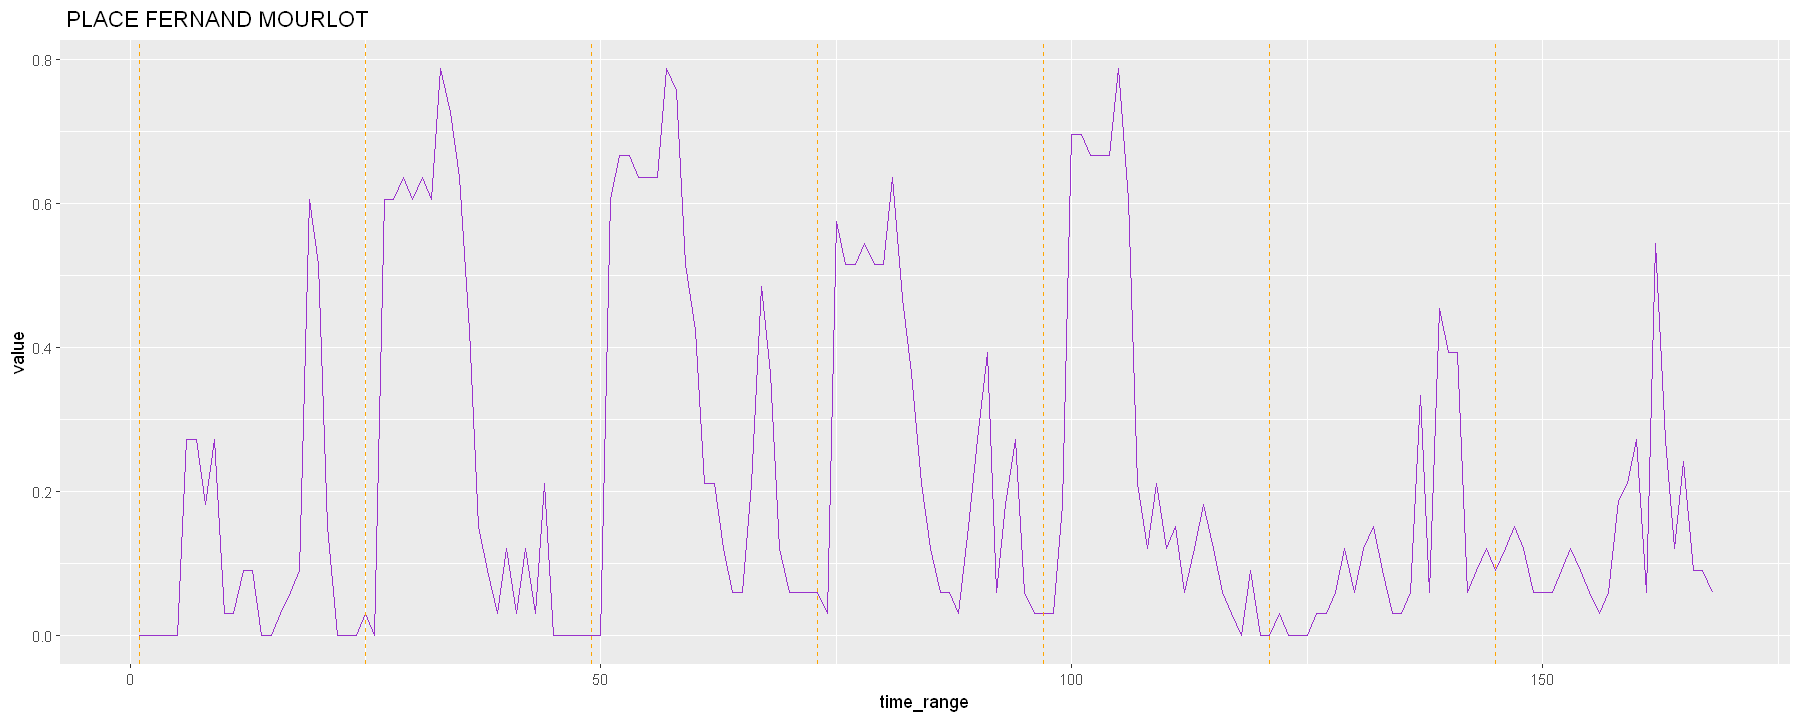

In [4]:
options(repr.plot.width = 15, repr.plot.height = 6)
time_tick = 1 + 24*(0:6)
i = sample(1:1189,1)
df = melt(loading[i,])
df$time_range = 1:ncol(loading)
ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=velib$names[i])

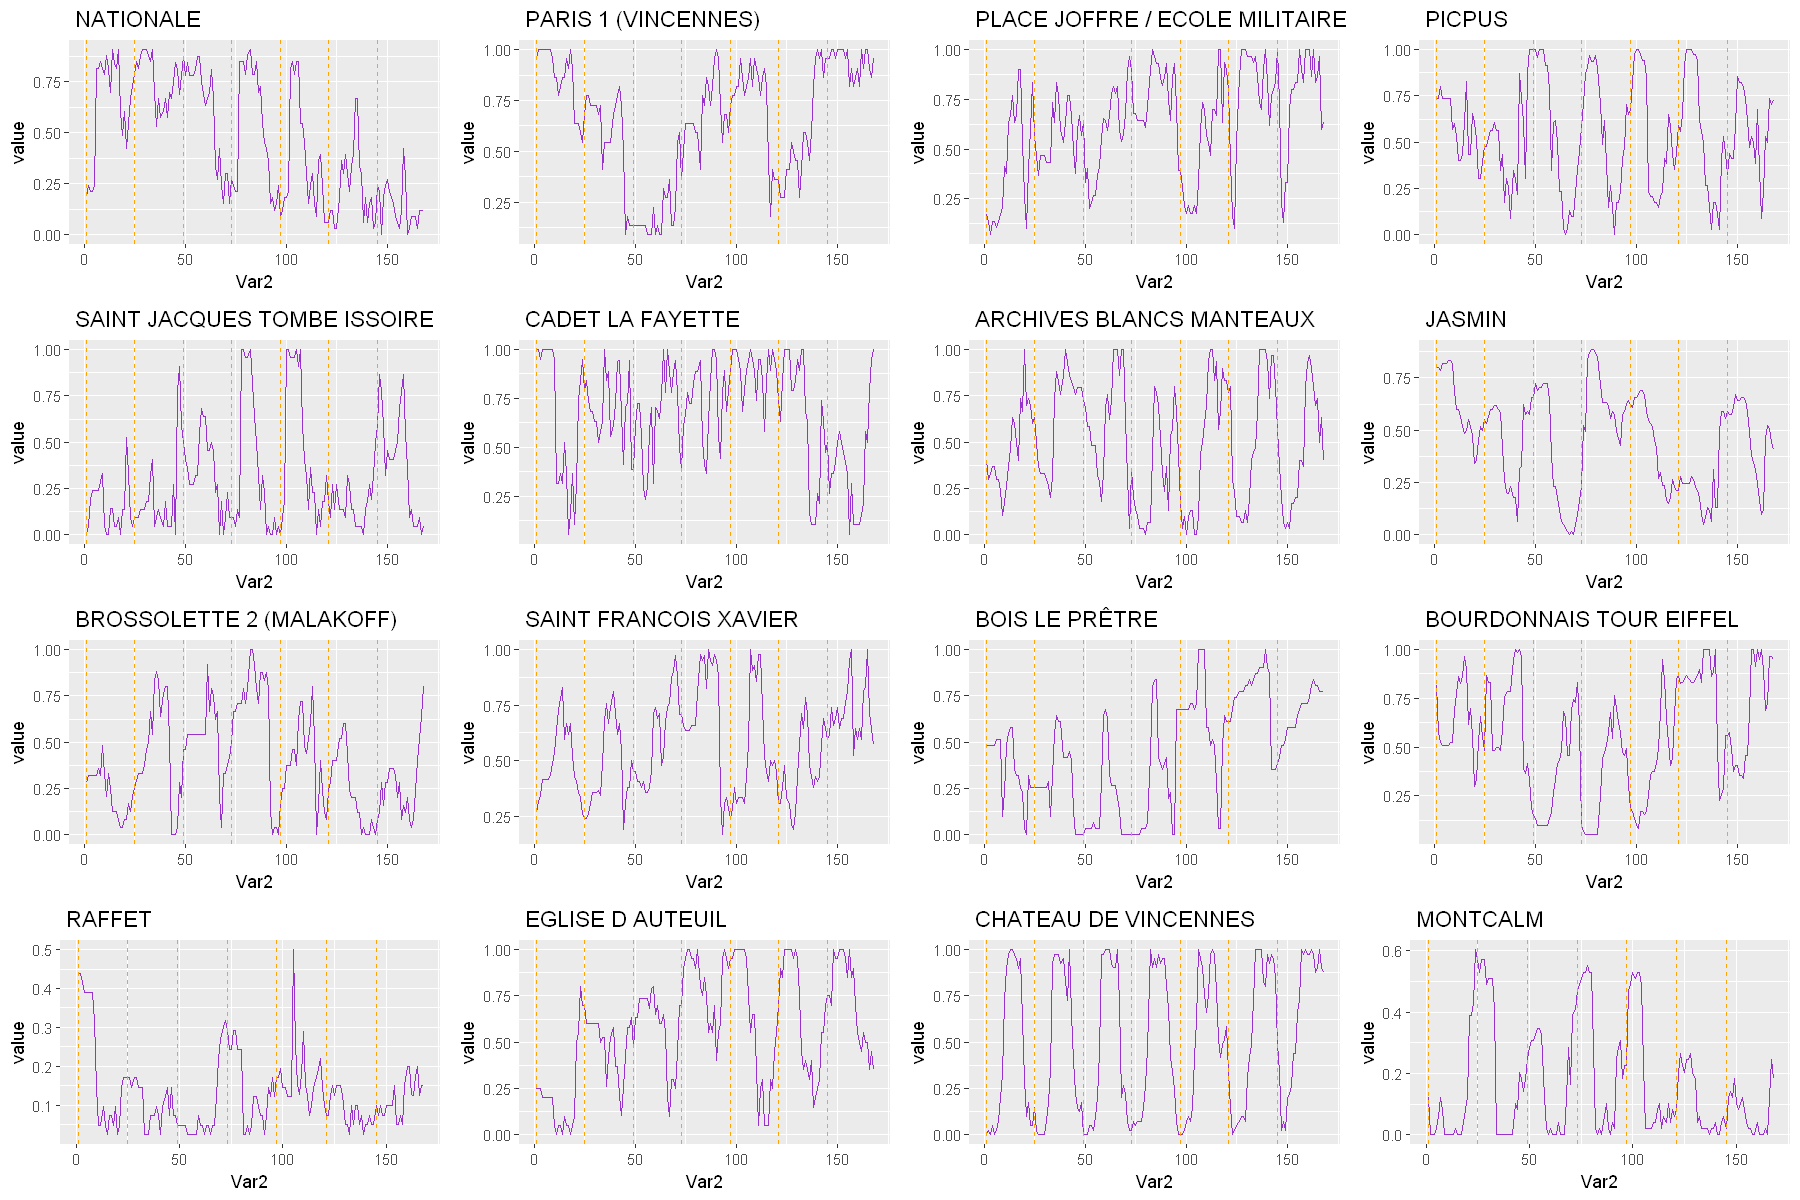

In [58]:
options(repr.plot.width = 15, repr.plot.height = 10)

# --- #

timeTick = 1 + 24*(0:6)  # vector corresponding to the beginning of days

# select 16 stations
stations = sample.int(nrow(loading), 16)

df = melt(loading[stations,])  #the function melt reshapes it from wide to 

p = list()
for (i in 1:16){
    dfi = df[df$Var1 == velib$names[stations[i]],]
    p[[i]] = ggplot(dfi, aes(x=Var2, y=value)) + 
        geom_line(col="darkorchid") + 
       geom_vline(xintercept=timeTick, col="orange", linetype="dashed") +
       labs(title=velib$names[stations[i]])
}
do.call(grid.arrange,p)

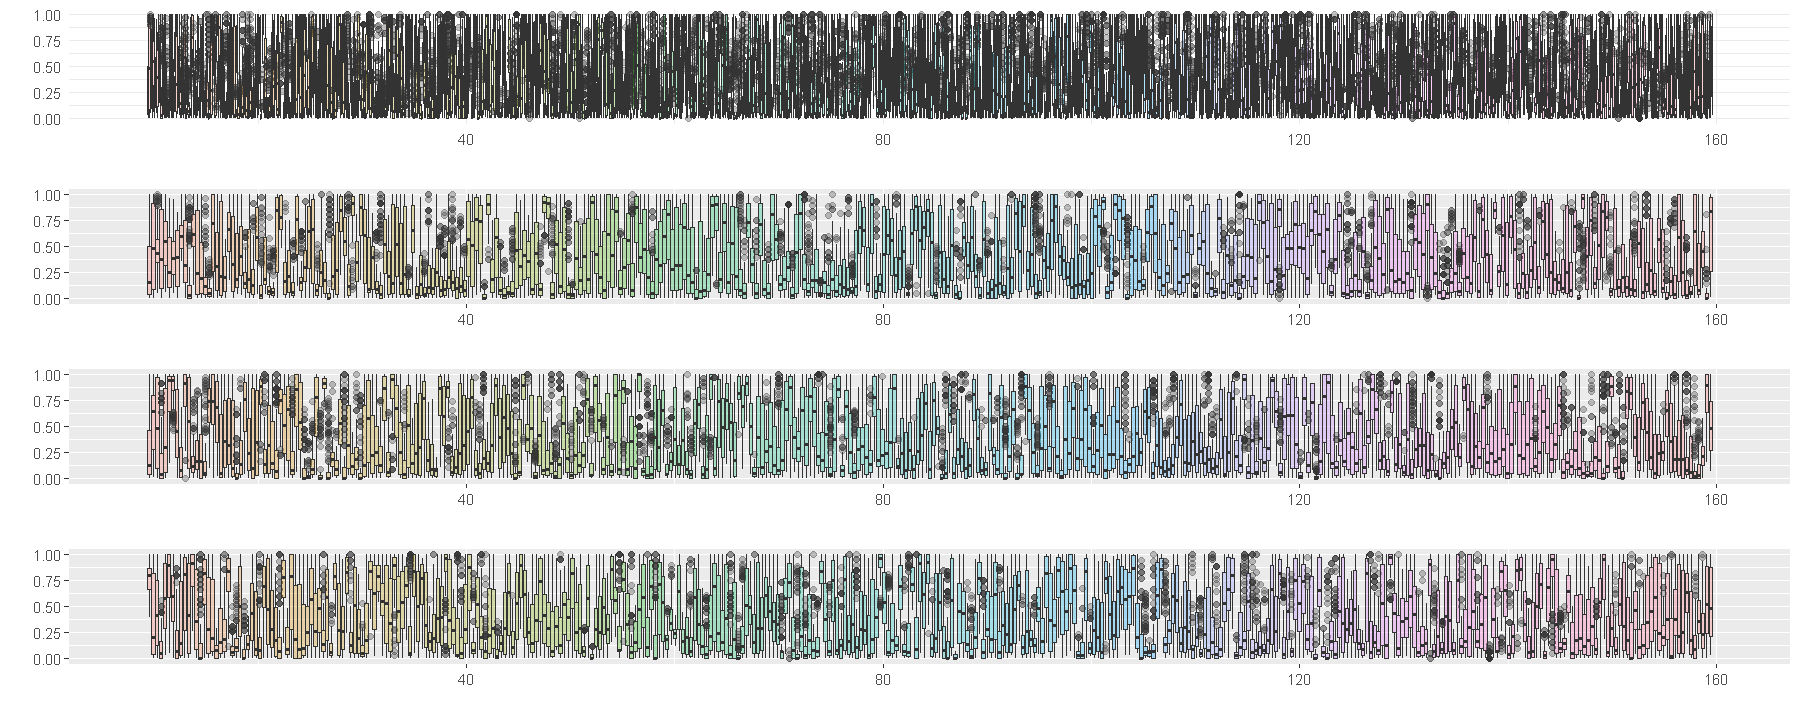

In [59]:
options(repr.plot.width = 15, repr.plot.height = 6)

# --- #

df = melt(loading)
p1 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('') + theme_minimal()

# --- #

# Only a third of the data
df = melt(loading[ seq(from=1, to=+floor(nrow(loading)/3)) ,])
p2 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The next third
df = melt(loading[ seq(from=1+floor(nrow(loading)/3), to=2*floor(nrow(loading)/3)) ,])
p3 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The remaining third
df = melt(loading[ seq(from=1+2*floor(nrow(loading)/3), to=nrow(loading)) ,])
p4 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# --- #

grid.arrange(p1, p2, p3, p4, nrow=4)

In [27]:
### on peut voir que certaines stations ont des cycles de chargement distinctifs, présentent des spécificités particulières
### en fonction de l'heure de la journée, jour de la semaine, parfois présence de pics...

In [60]:
print('--- Average fill rate ---')
print(mean(loading))
# --- #
print('')

print('--- Least crowded station, on average ---')
i = which.min(rowMeans(loading)) 
print(rowMeans(loading)[i])

# --- #
print('')

print('--- Fullest station, on average ---')
i = which.max(rowMeans(loading))
print(rowMeans(loading)[i])

[1] "--- Average fill rate ---"
[1] 0.3816218
[1] ""
[1] "--- Least crowded station, on average ---"
 HORNET (BAGNOLET) 
        0.01613284 
[1] ""
[1] "--- Fullest station, on average ---"
 INSURRECTION AOUT 1944 (IVRY) 
                     0.9193723 


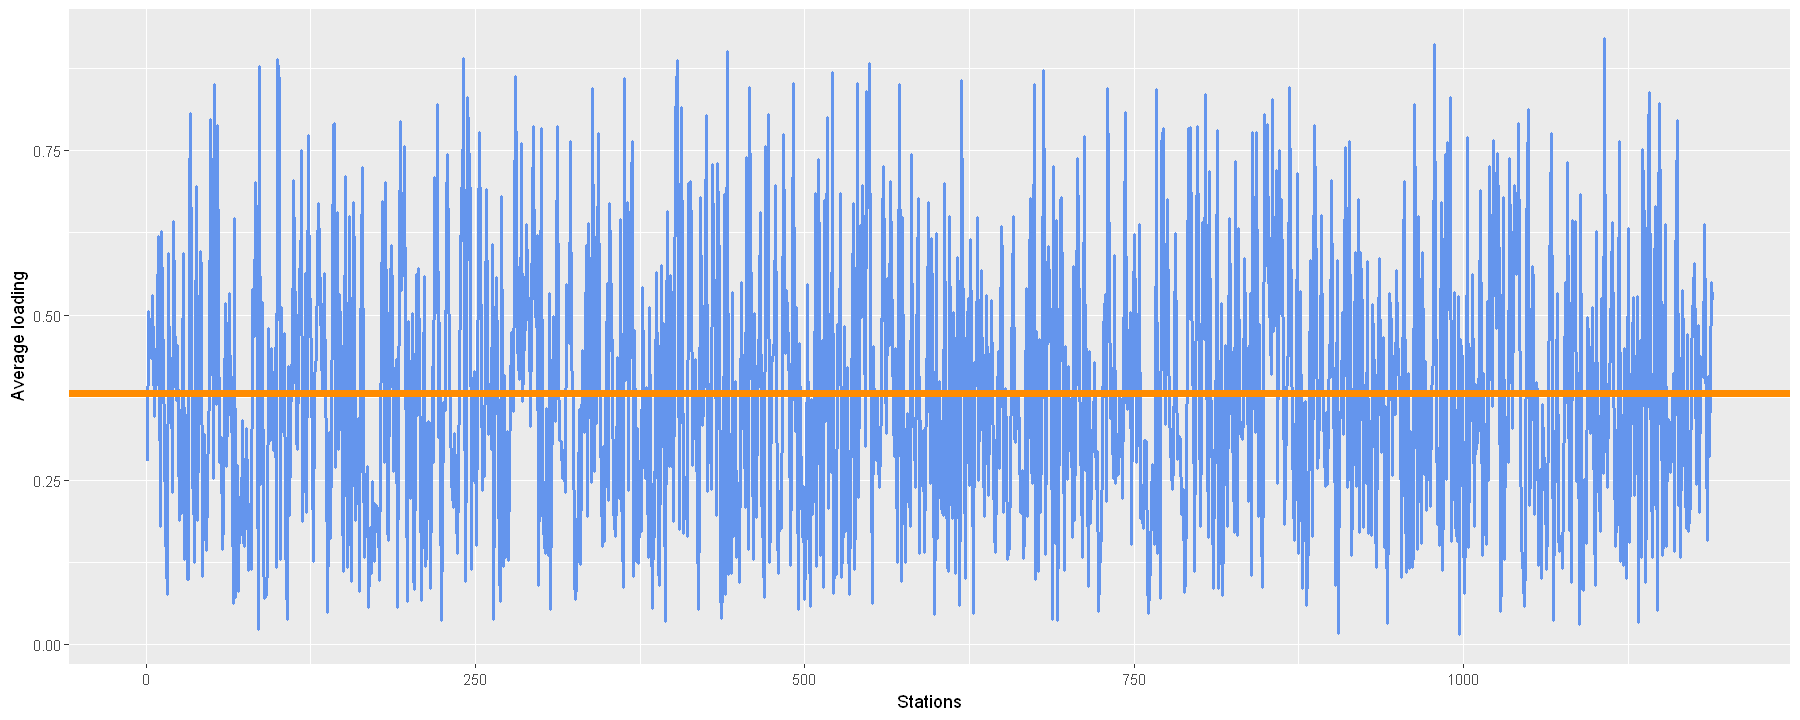

In [61]:
options(repr.plot.width = 15, repr.plot.height = 6)

df = data.frame(stations = c(1:nrow(loading)), mean = rowMeans(loading))
ggplot(df, aes(x = stations, y= mean)) + 
    geom_line(color = 'cornflowerblue', linewidth=1) +
    geom_hline(yintercept = mean(loading), color = 'darkorange', linewidth=2) +
    labs(x = "Stations", y = "Average loading")

In [ ]:
### Certaines stations sont plus souvent chargées (pleines) que d'autres.
### Remarque : ce n'est pas parce qu'une station est toujours vide qu'elle correspond à une zone pauvre en activités. En effet, cela signifie seulement 
### qu'elle n'a jamais un taux de chargement très élevé : dès qu'un vélo arrive, il est peut-être repris dans la foulée. 
### De plus, ce qui serait intéressant d'analyser, ce serait plutôt les dynamiques de circulation des vélos, les échanges de vélo entre stations. 

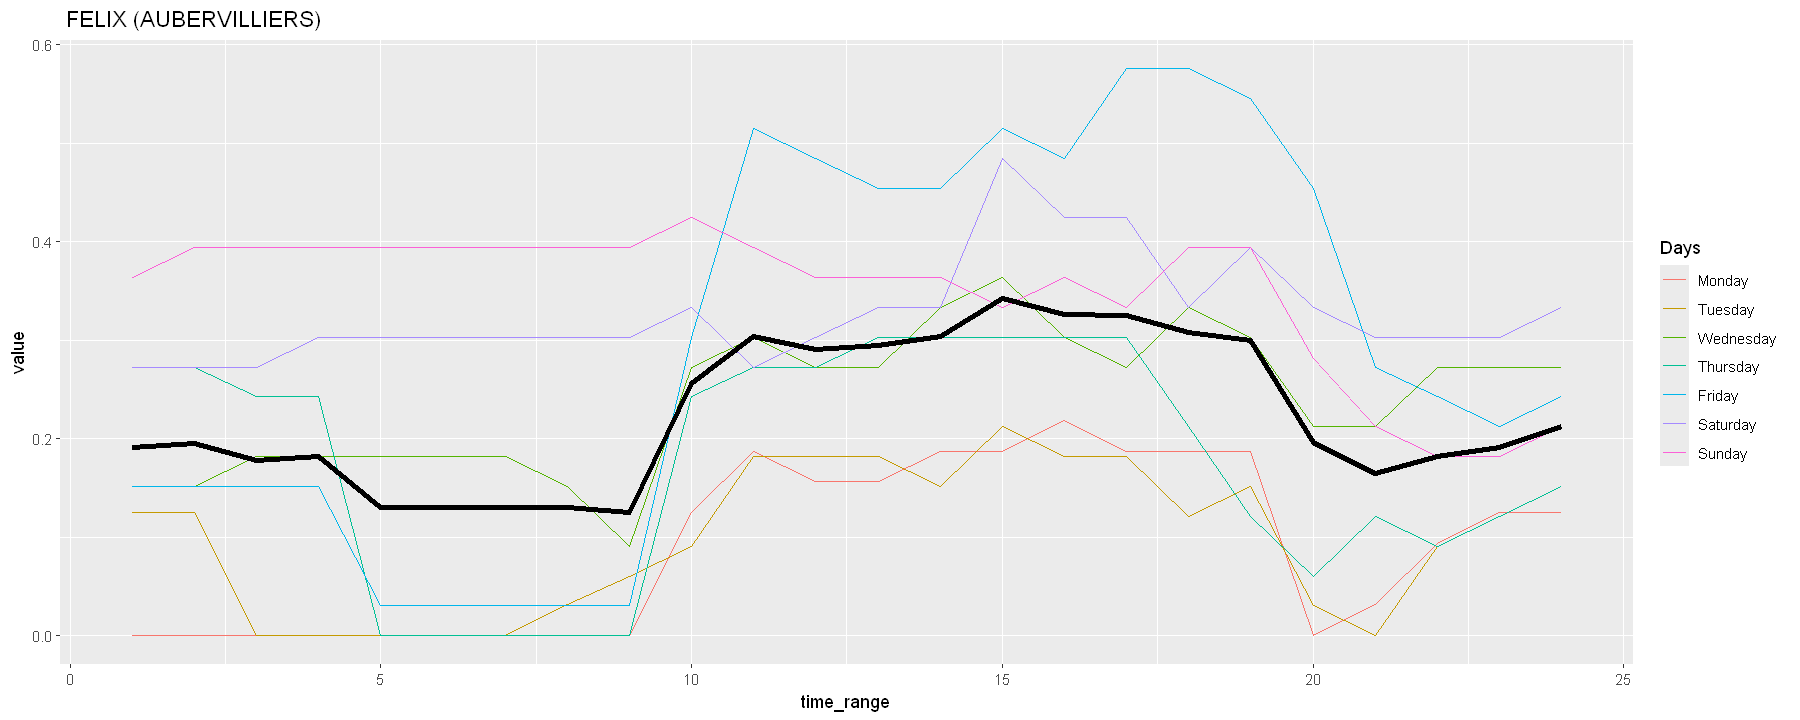

In [62]:
### Influence de l'heure de la journée
options(repr.plot.width = 15, repr.plot.height = 6)
time_range = 1:24
i = sample(1:1189,1)
df = loading[i,]
mean_per_hour_per_day = matrix(df, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)

ggplot() +  
       geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
       geom_line(data=mean_per_hour, aes(x = time_range , y=Weekly), linewidth = 1.5) +
       labs(title=velib$names[i])

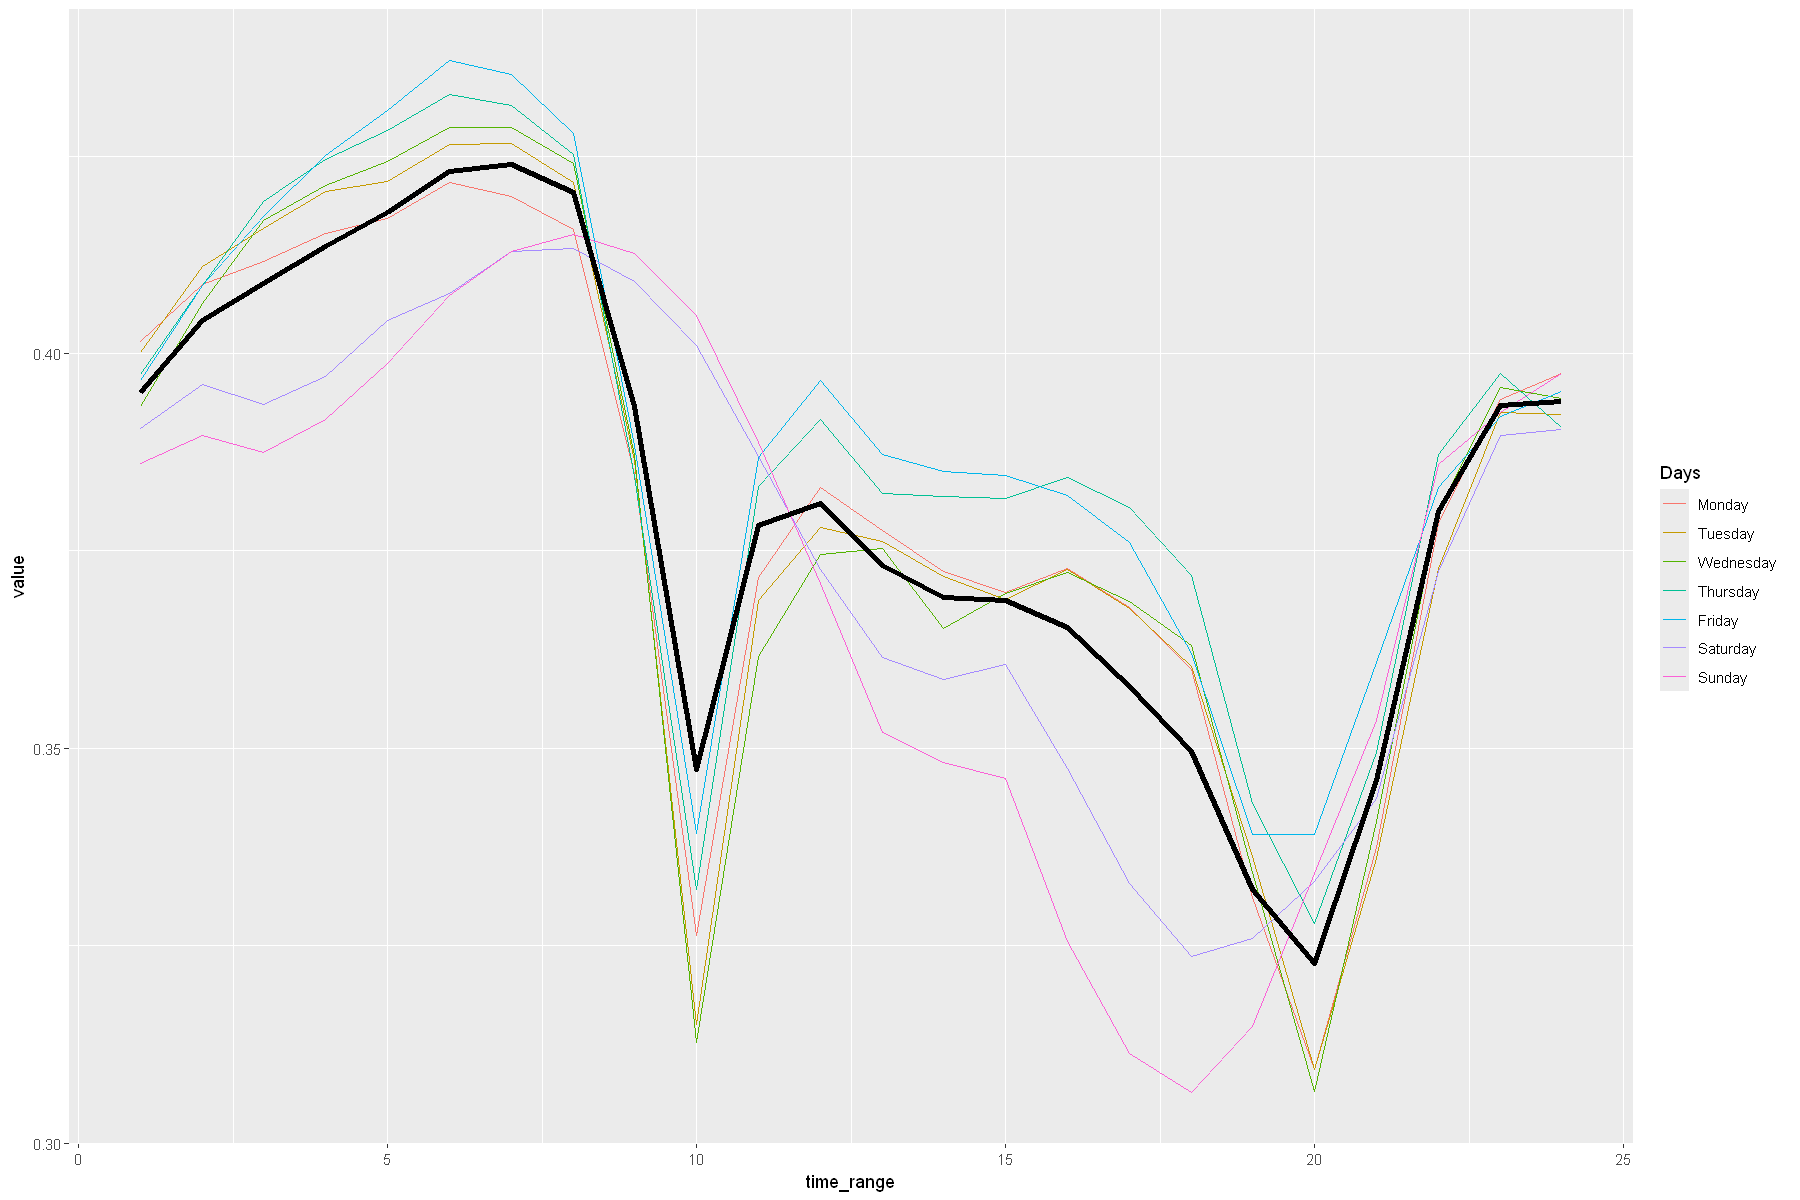

In [63]:
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)
# --- #

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)

# --- #
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() +  
        geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
        geom_line(data=mean_per_hour, aes(x = time_range , y=Weekly), linewidth = 1.5)


In [15]:
### conclusion : on ne peut pas distinguer de comportement jour/nuit en moyenne car ça s'équilibre sur les stations (on varie entre 42,5 et 37,5)
### Néanmoins, on peut voir que certaines stations sont plus pleines la nuit que le jour et inversement d'autres sont plus pleines le jour que la nuit
### Donc pourquoi pas envisager des classes entre les stations prises la nuit et celles prises le jour (et imaginer des va et vient de vélos entre elles)
### stations proches des lieux de travail donc pleines le jour, d'autres proches des lieux de résidence (en périphérie) donc pleines la nuit.
### voir map

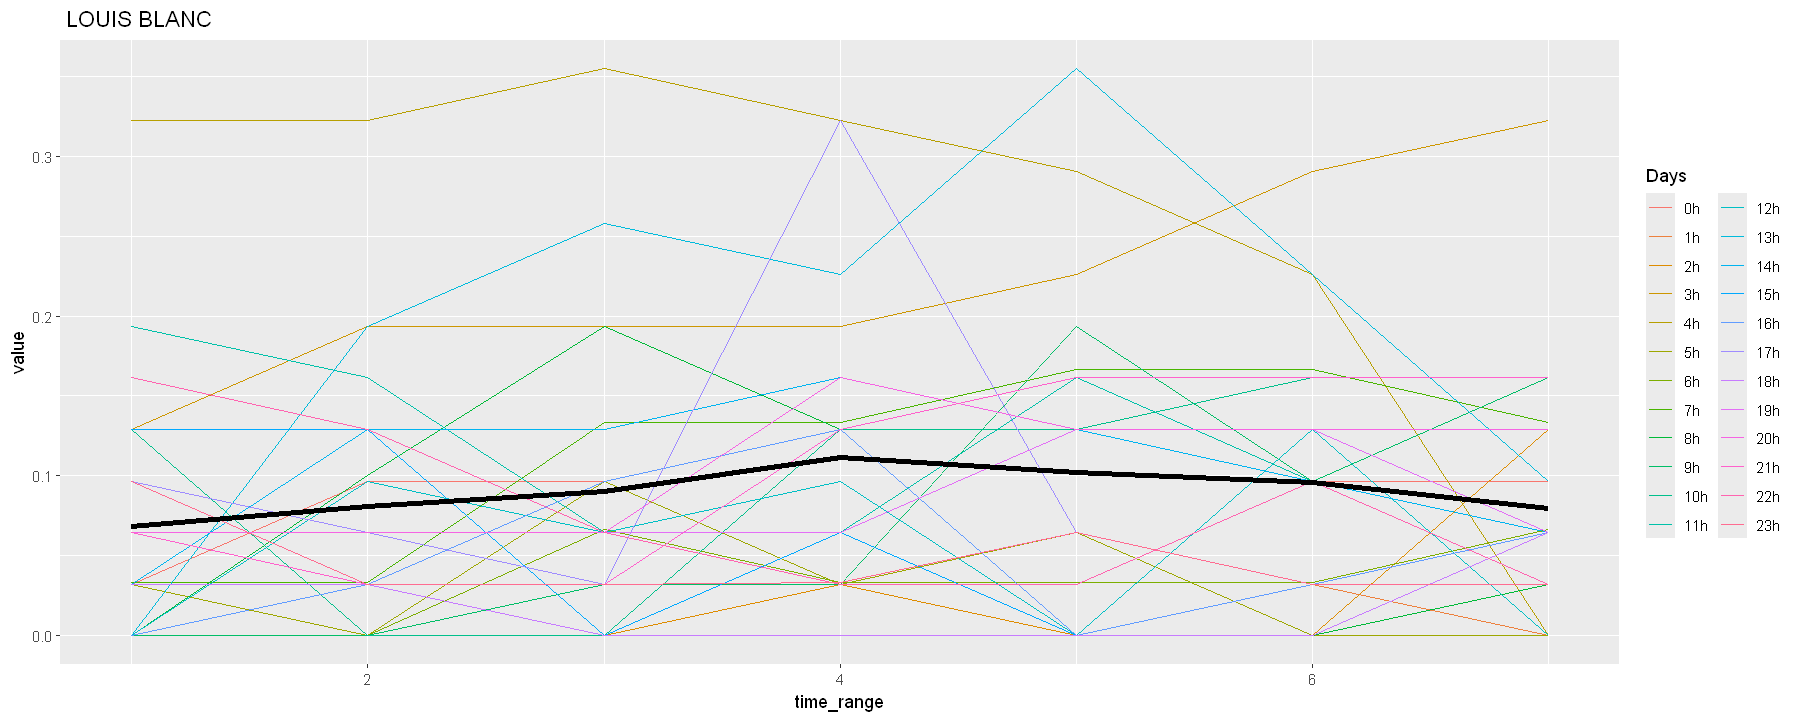

In [64]:
### Influence du jour de la semaine
options(repr.plot.width = 15, repr.plot.height = 6)
time_range = 1:7
i = sample(1:1189,1)
df = loading[i,]
mean_per_hour_per_day = matrix(df, nrow = 7)
mean_per_hour         = rowMeans(mean_per_hour_per_day)

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h")
mean_per_hour_per_day$time_range = c(1:7)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:7)

ggplot() +  
       geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
       geom_line(data=mean_per_hour, aes(x = time_range , y=Weekly), linewidth = 1.5) +
       labs(title=velib$names[i])

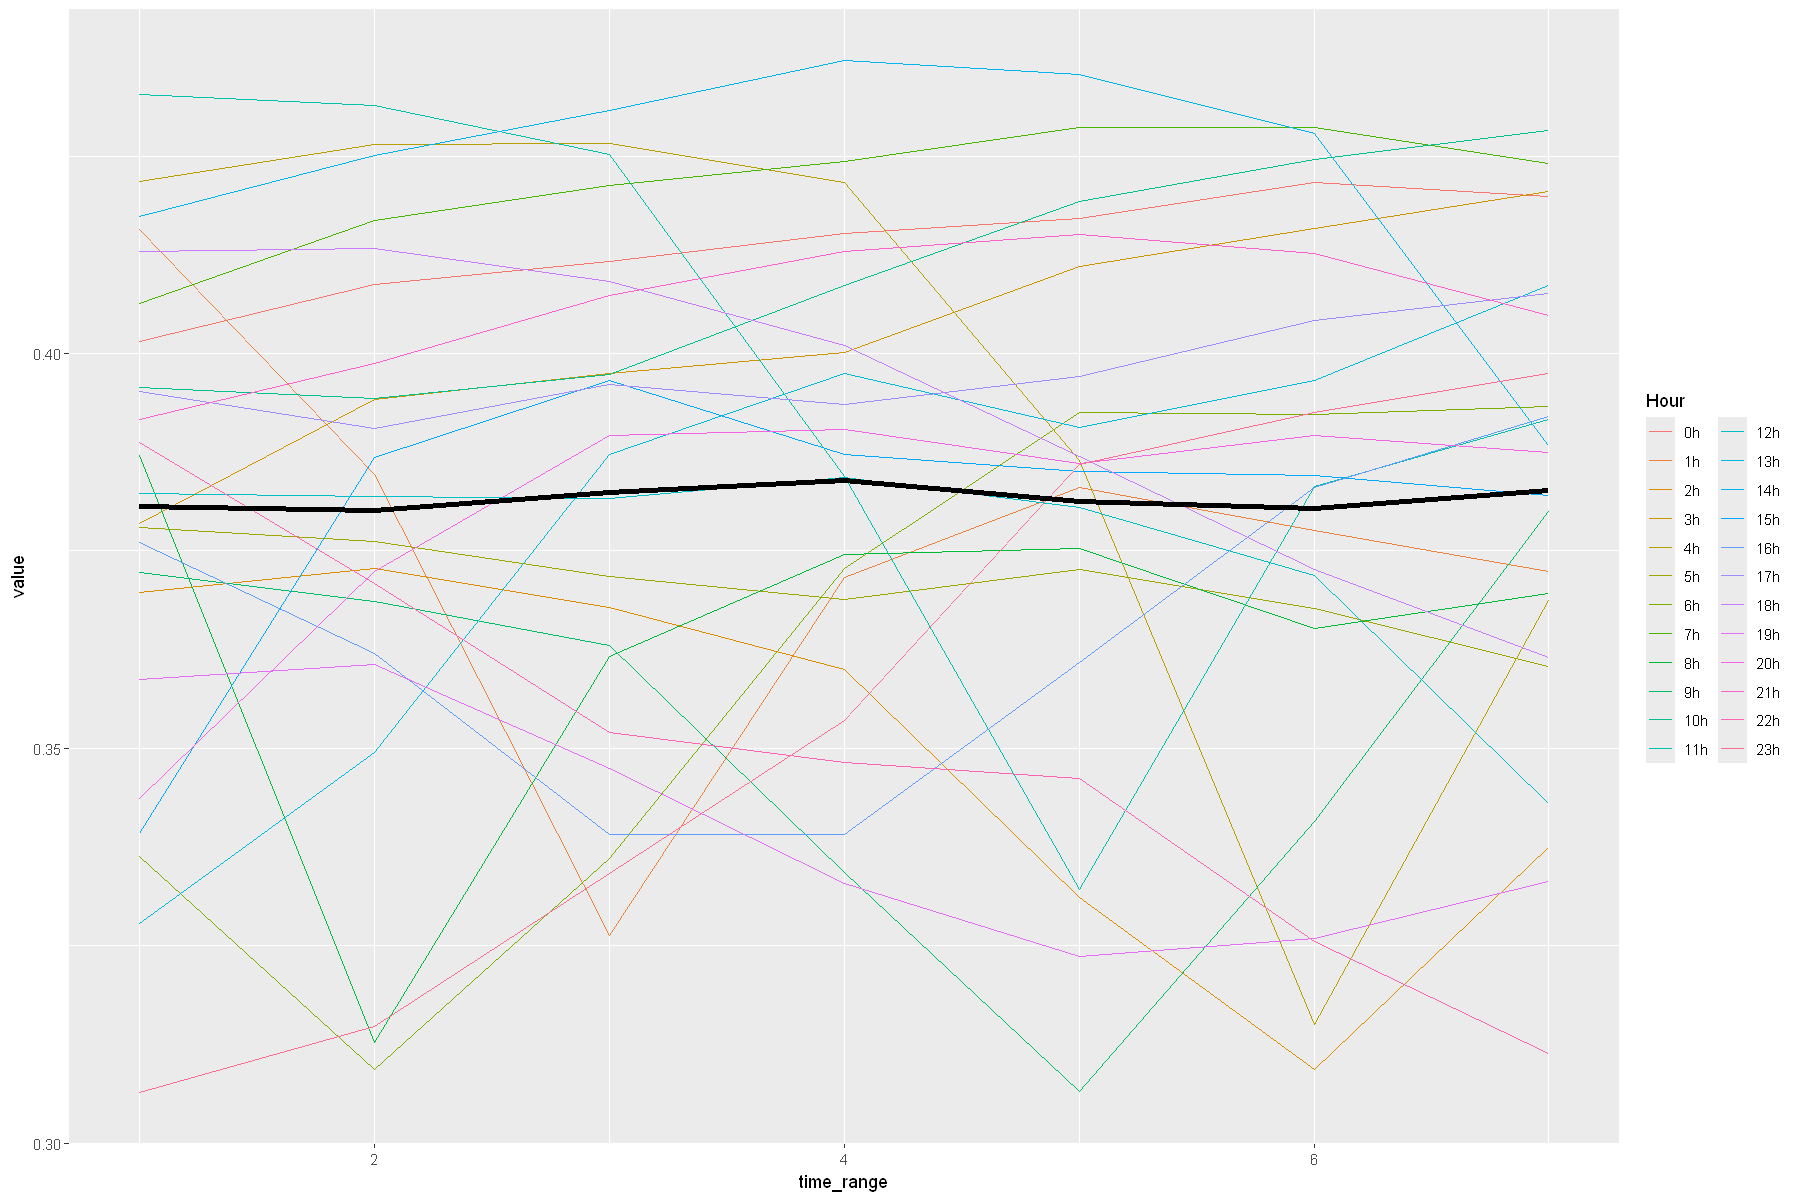

In [65]:
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 7)
mean_per_hour         = rowMeans(mean_per_hour_per_day)
# --- #

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day) <- list("0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h")
mean_per_hour_per_day$time_range = c(1:7)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Hour')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:7)

# --- #
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() +  
        geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Hour)) + 
        geom_line(data=mean_per_hour, aes(x = time_range , y=Weekly), linewidth = 1.5)

In [24]:
### conclusion : on ne peut pas distinguer de comportement semaine/week-end en moyenne
### En plus de ça, on s'aperçoit que le taux de chargement de chaque station (prise induviduellement) ne varie pas en fonction des jours

In [66]:
library(ggmap)
register_stadiamaps("70336e80-6f2f-4a48-ab71-45657cb2a38c", write = TRUE)
library(viridis)

ℹ Replacing old key (70336e80) with new key in C:\Users\pauld\Documents/.Renviron



ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



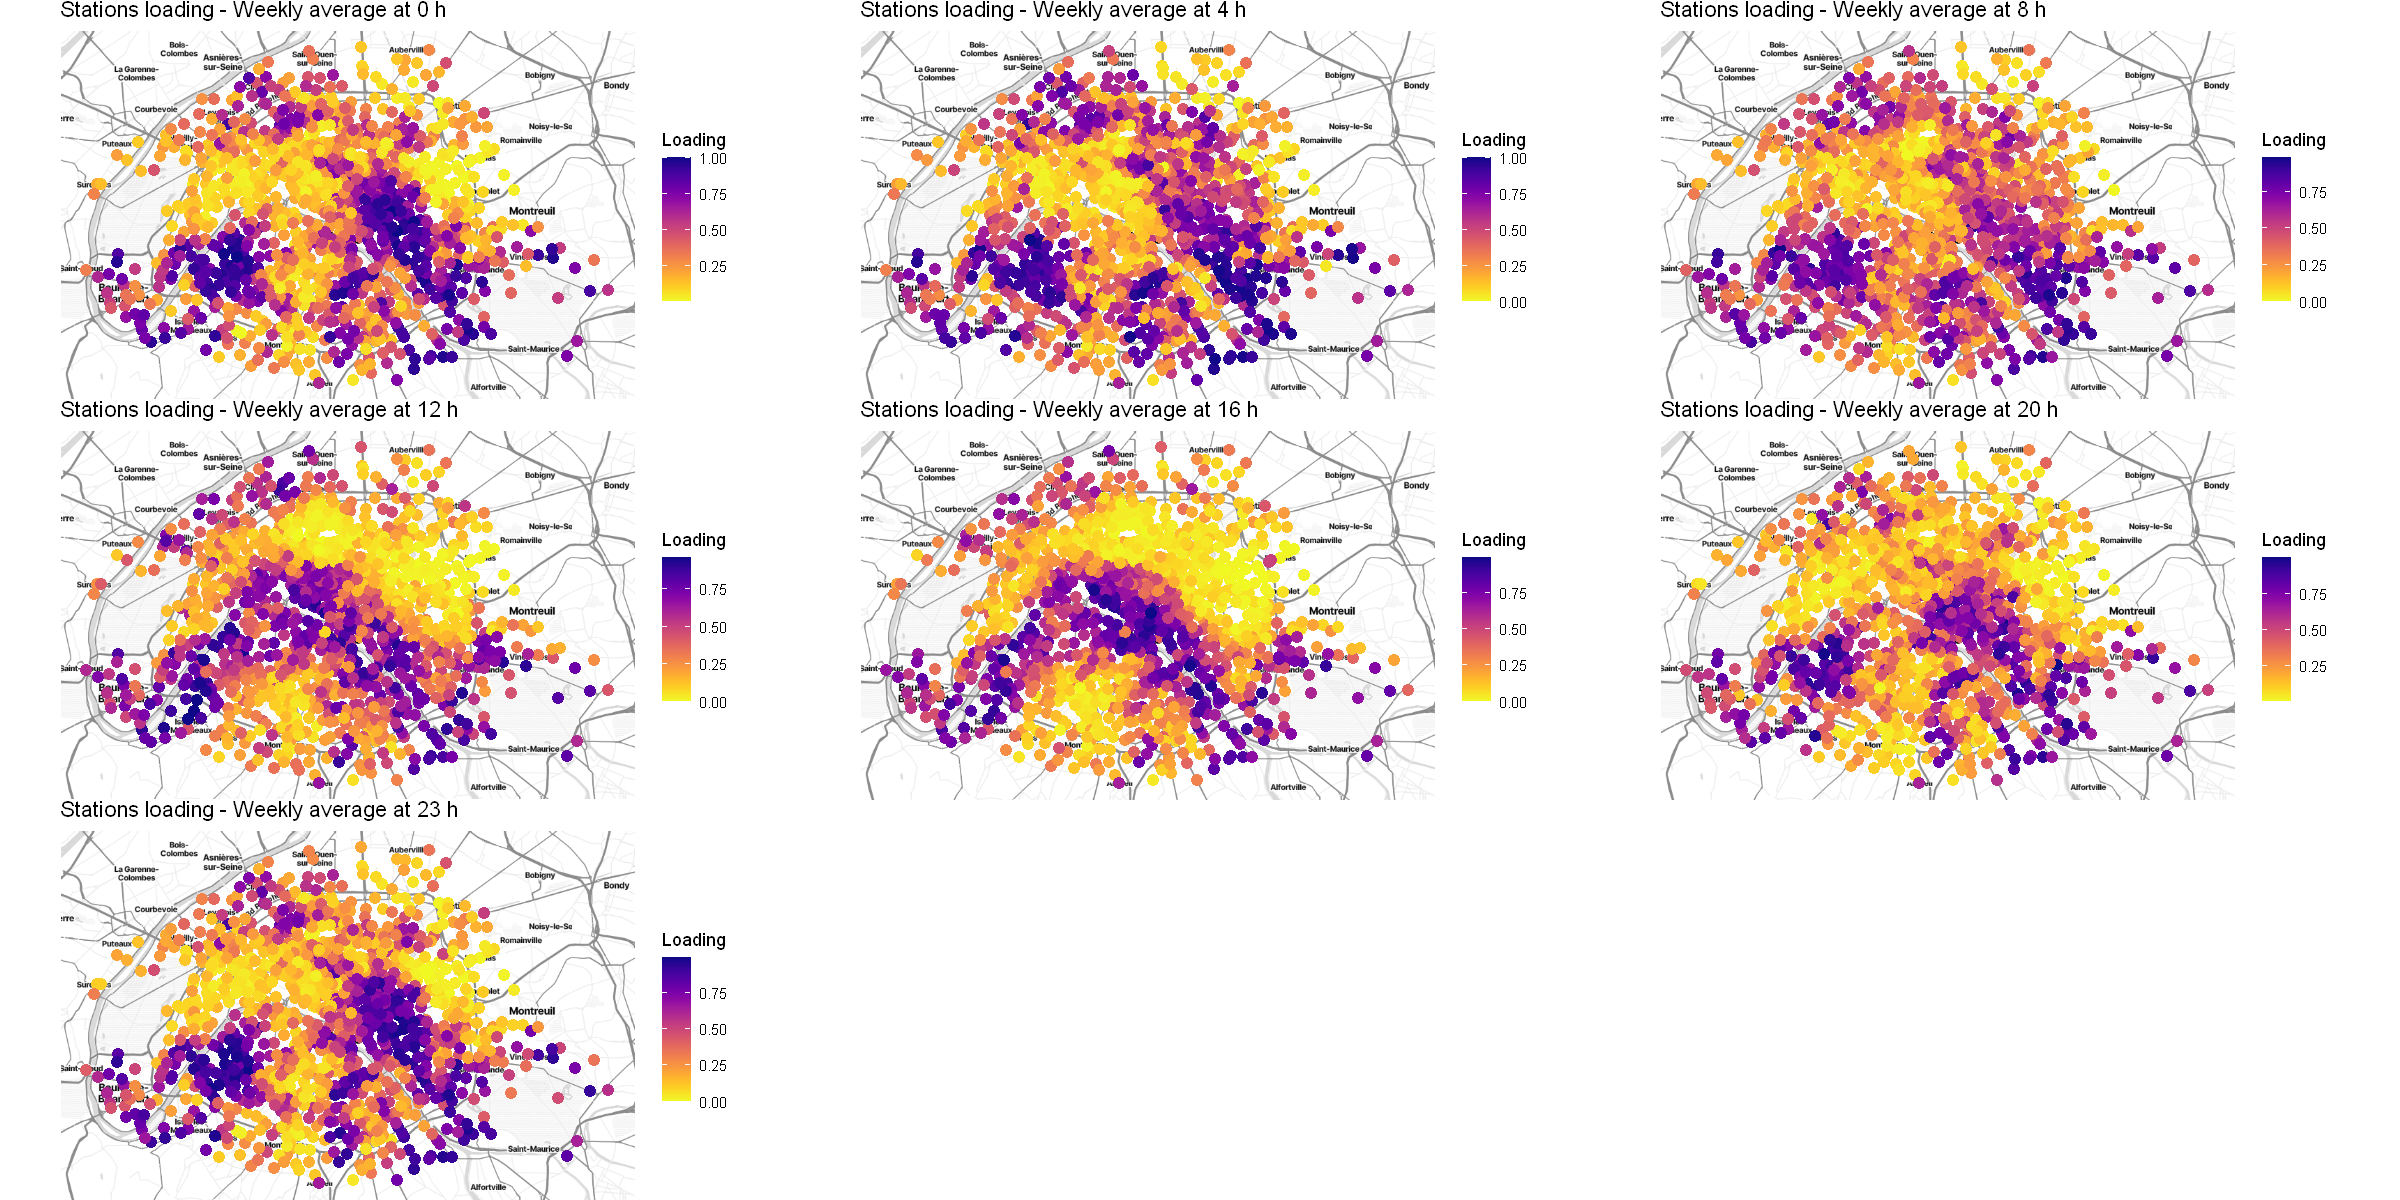

In [67]:
options(repr.plot.width = 20, repr.plot.height = 10)
hour = c(1,5,9,13,17,21,24)

dfi = coord
p = list()
for (i in 1:length(hour)){
    h    = hour[i]
    hours = seq(h, 168, 24)
    load_per_hour = rowMeans(loading[,hours])

    df = coord
    df$loading = load_per_hour
    p[[i]] = qmplot(data=df, longitude, latitude, color=loading) + 
          geom_point(size = 3) + 
          scale_color_viridis(name = "Loading", option = "C", direction = -1) +
          labs(title = paste('Stations loading - Weekly average at',(h-1),'h'))
}

do.call(grid.arrange,c(p, ncol=3))

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



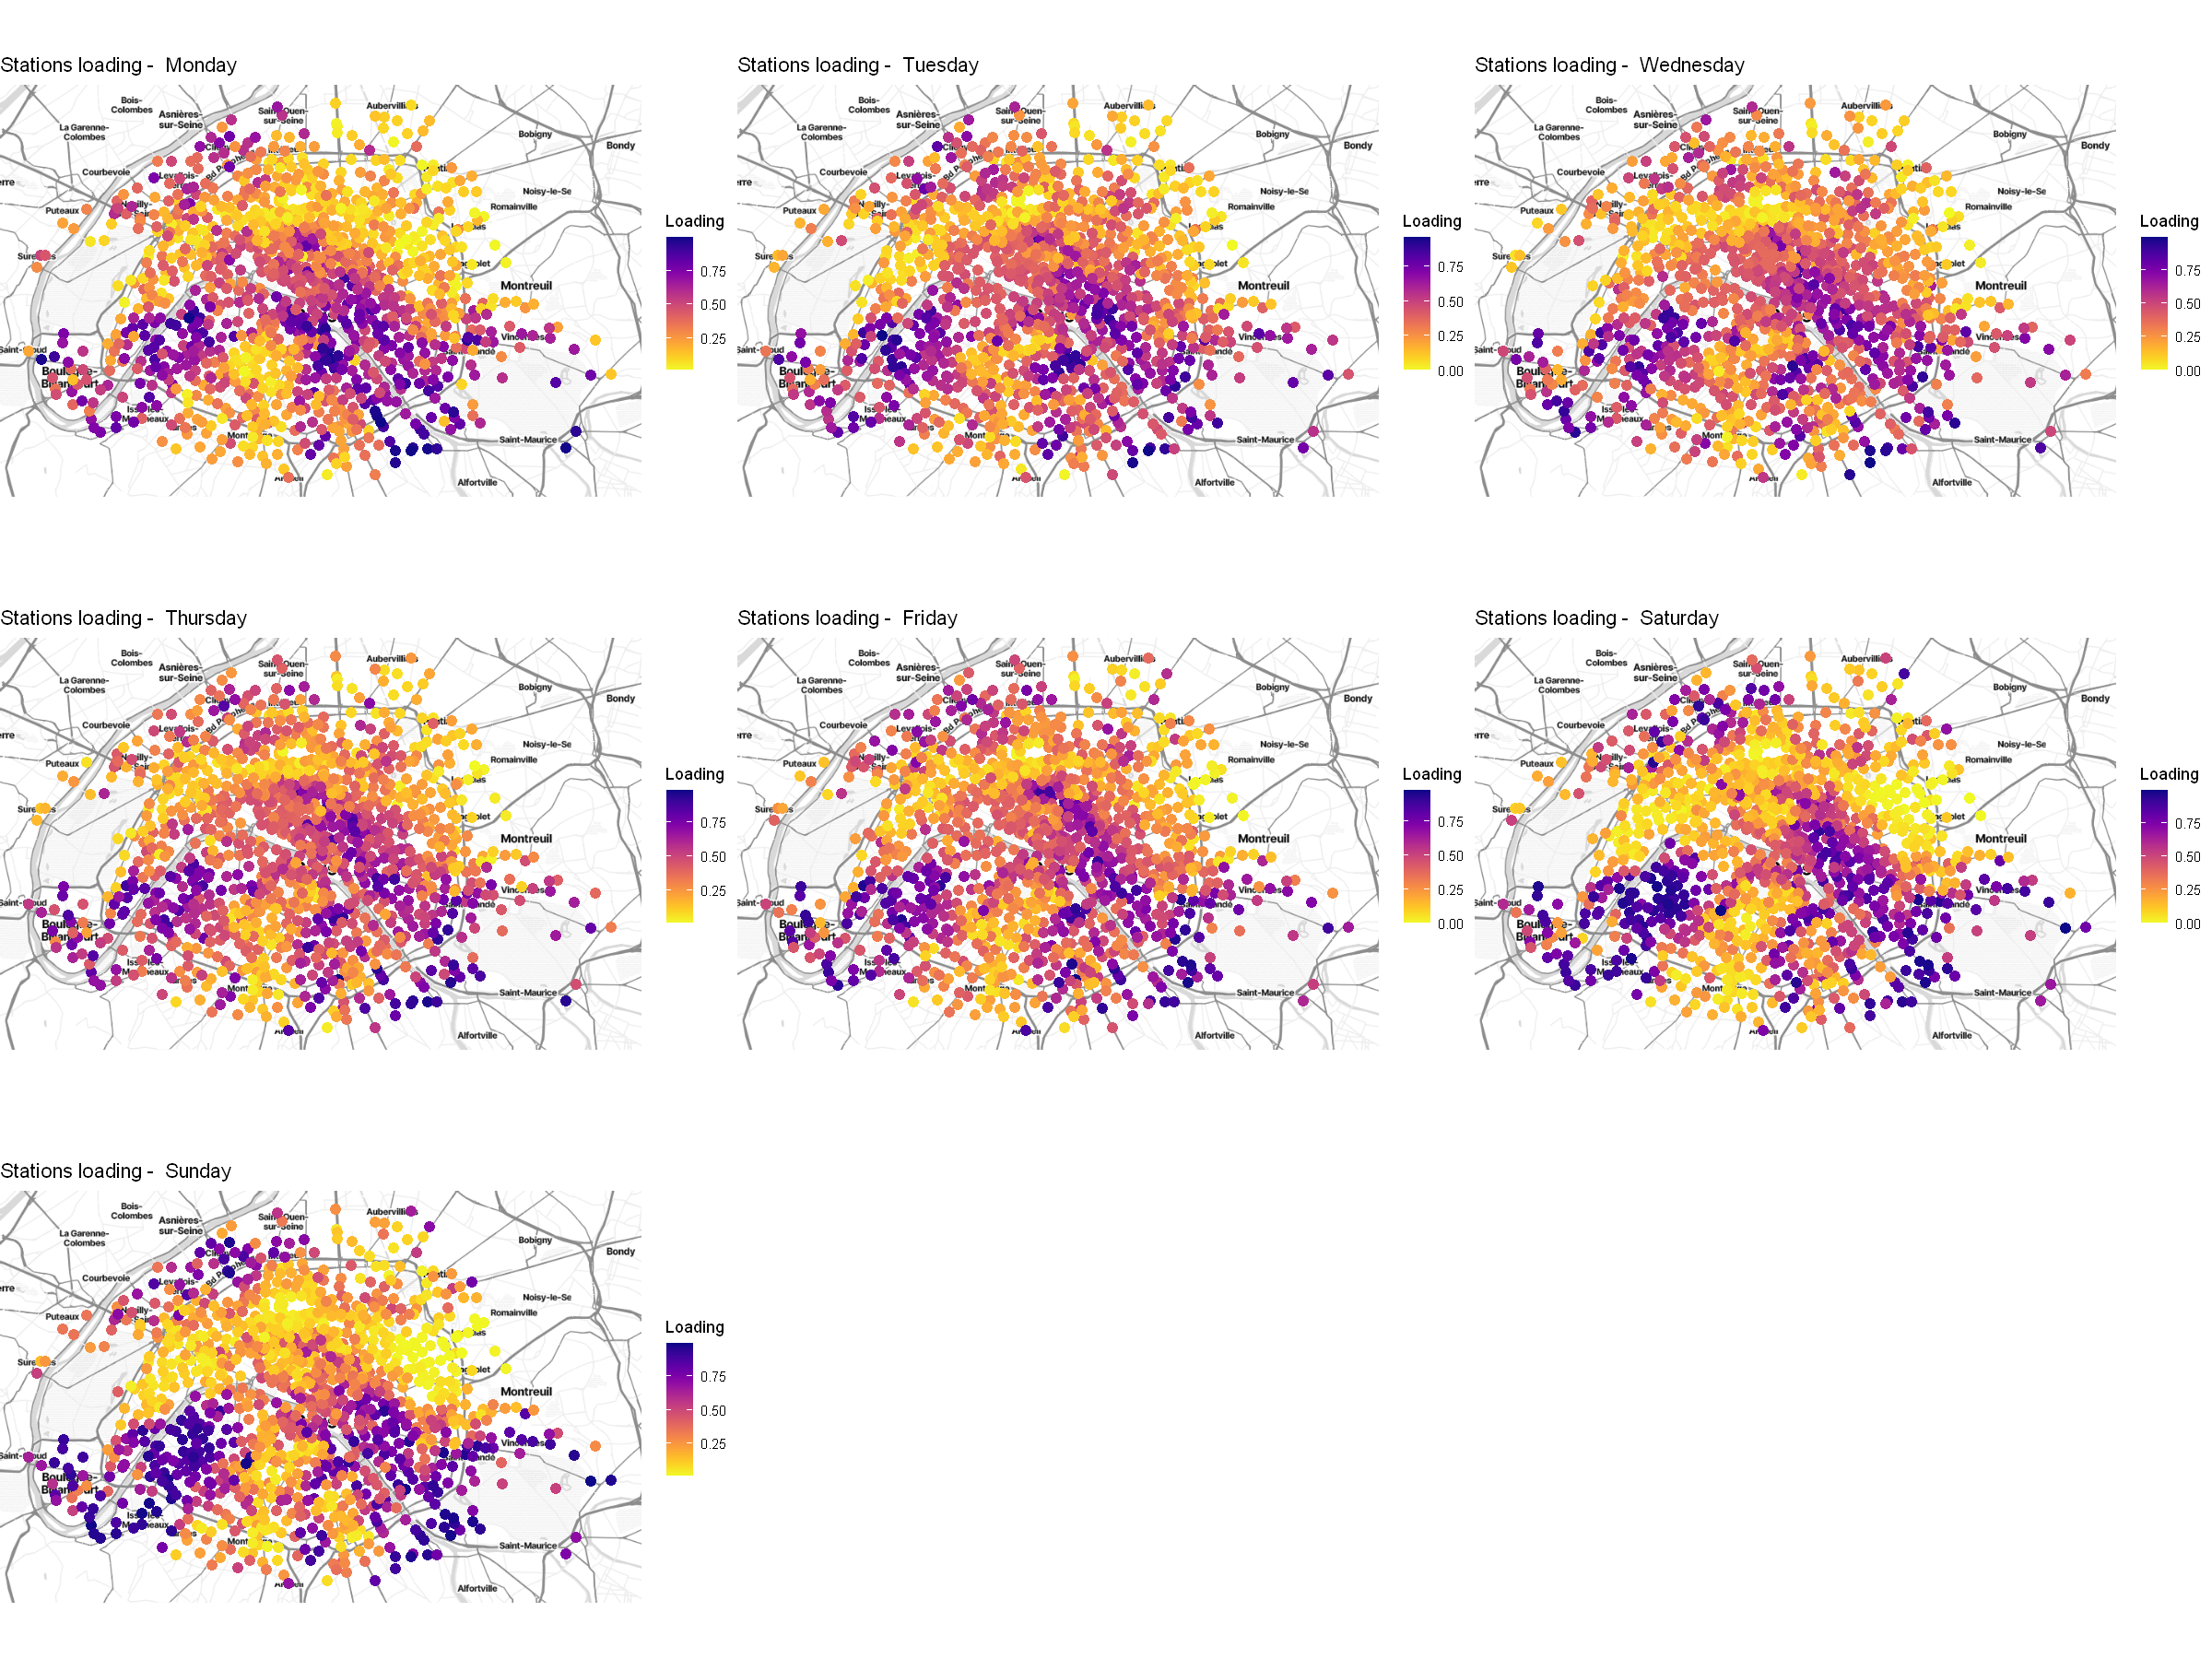

In [68]:
lundi <- rowMeans(loading[,c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)])
mardi <- rowMeans(loading[,c(25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48)])
mercredi <- rowMeans(loading[,c(49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72)])
jeudi <- rowMeans(loading[,c(73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96)])
vendredi <- rowMeans(loading[,c(97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120)])
samedi <- rowMeans(loading[,c(121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144)])
dimanche <- rowMeans(loading[,c(145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168)])


options(repr.plot.width = 20, repr.plot.height = 15)

days  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")

df = coord
df$lundi = lundi
df$mardi = mardi
df$mercredi = mercredi
df$jeudi = jeudi
df$vendredi = vendredi
df$samedi = samedi
df$dimanche = dimanche
p = list()
for (i in 1:7){
    load_per_day = df[,3+i]

    dfi = coord
    dfi$loading = load_per_day
    p[[i]] = qmplot(data=dfi, longitude, latitude, color=loading) + 
          geom_point(size = 3) + 
          scale_color_viridis(name = "Loading", option = "C", direction = -1) +
          labs(title = paste('Stations loading - ',days[i]))
}


do.call(grid.arrange,c(p, ncol=3))

In [ ]:
### déplacement des résidences vers le centre ville puis retour des vélos vers 19h.

In [26]:
### le week-end par rapport à la semaine : énormes disparités de chargement entre stations : des stations très pleines et d'autres bcp moins
### le week-end accentue les disparités

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



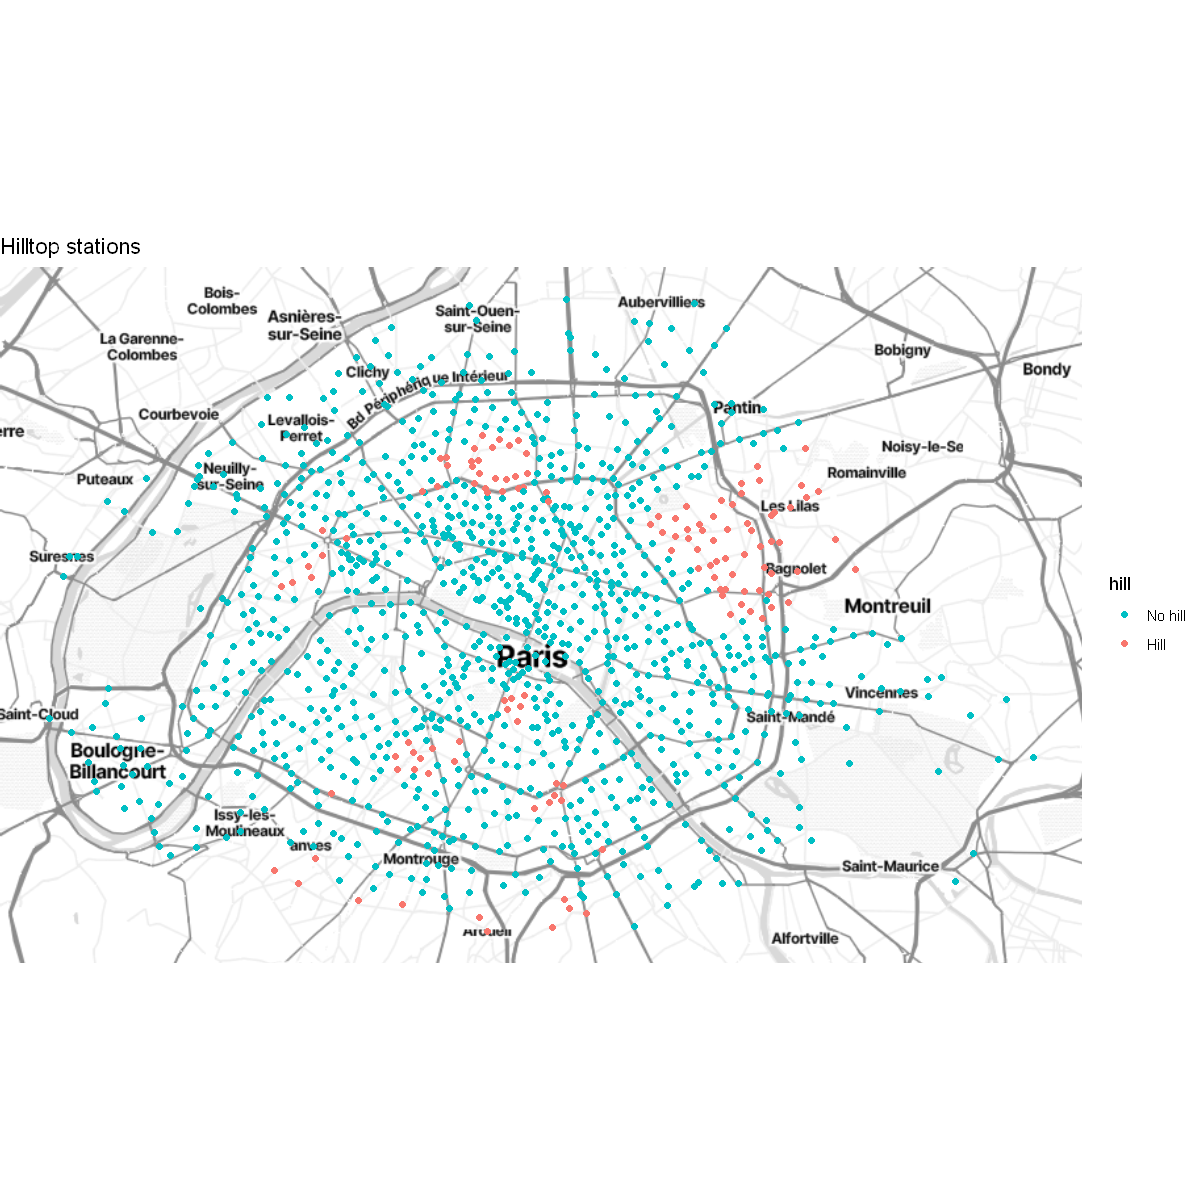

In [69]:
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

options(repr.plot.width = 10, repr.plot.height = 10)

qmplot(data=coord, longitude, latitude, color=hill) +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')

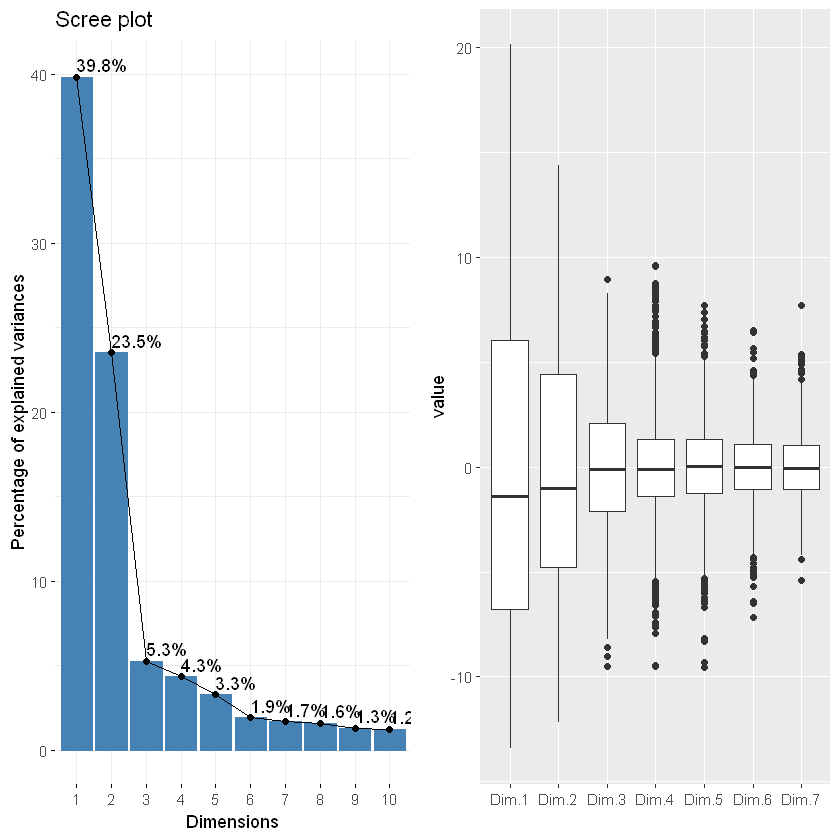

In [5]:
### ACP
loading <- as.data.frame(loading)
loading$Hill <- as.factor(coord$bonus)
acp <- PCA(loading, scale.unit = TRUE,
           graph = FALSE, quali.sup=169, ncp = 7)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

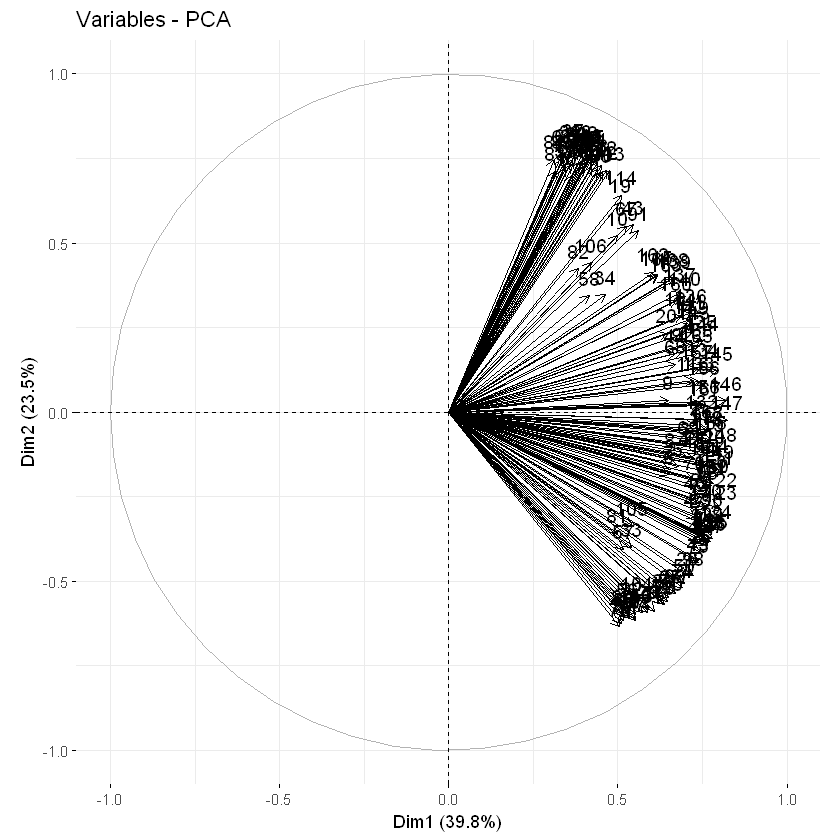

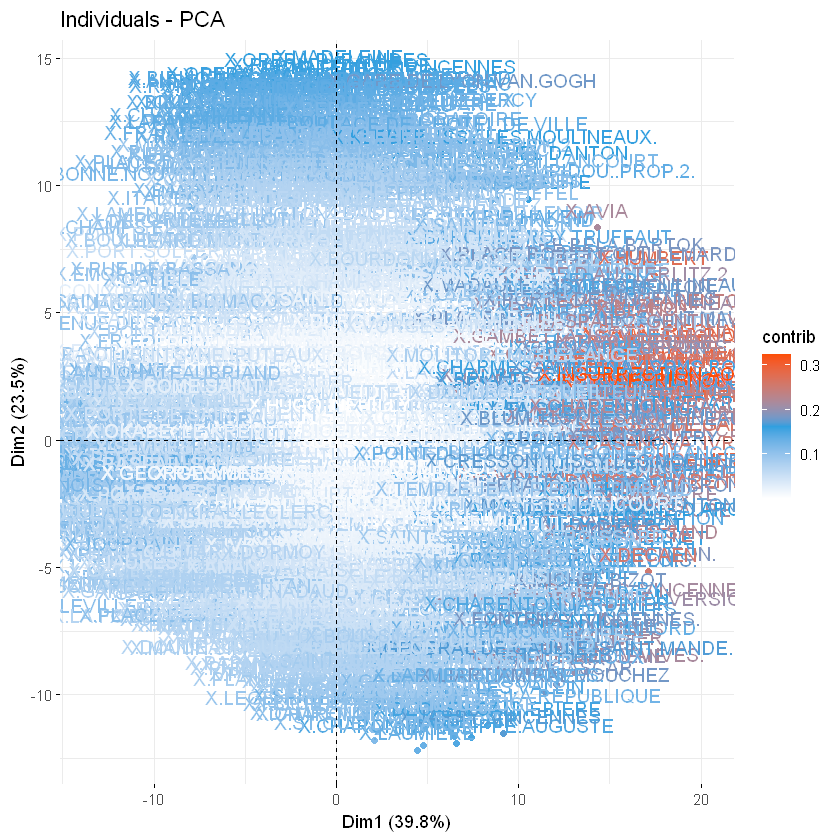

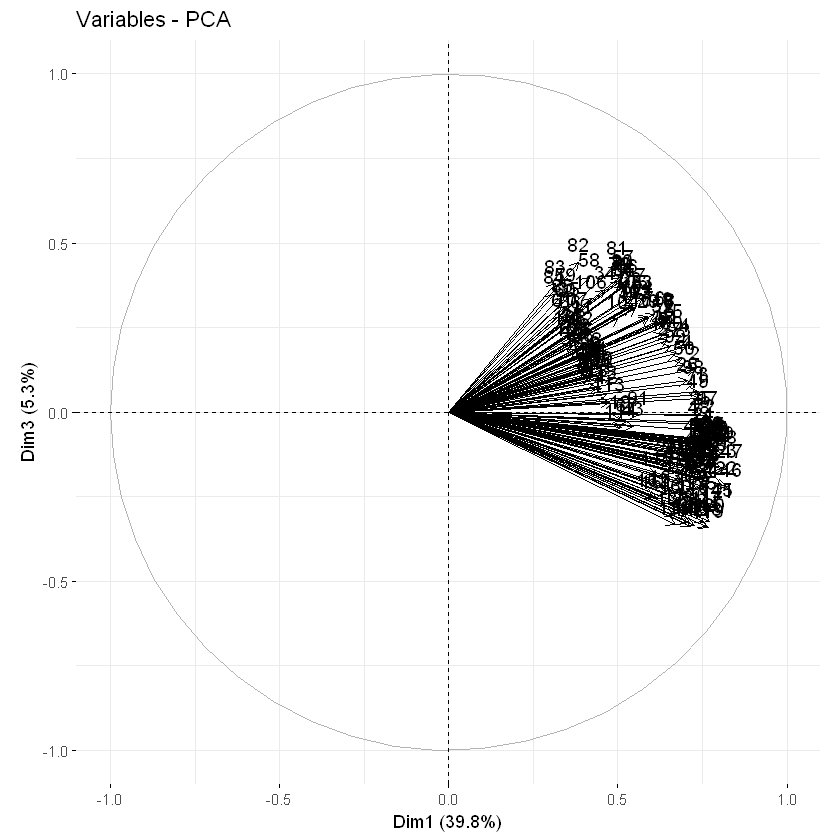

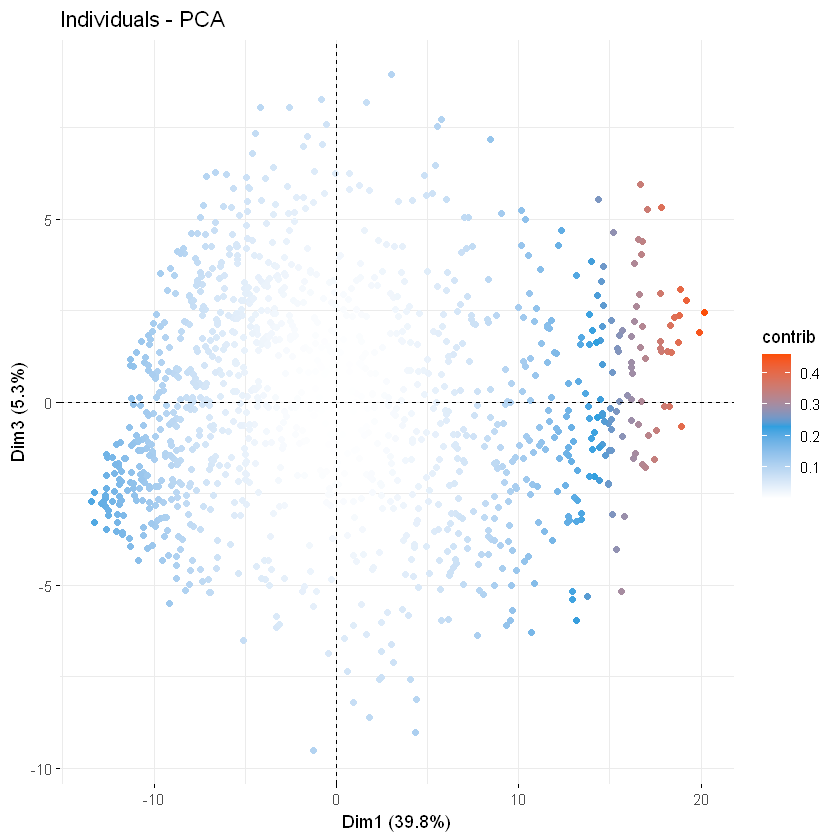

In [17]:
fviz_pca_var(acp, axes = c(1,2))
fviz_pca_ind(acp,col.ind="contrib",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

In [19]:
minuit_am <- rowMeans(loading[,c(1,25,49,73,97,121,145)])
une_am <- rowMeans(loading[,c(2,26,50,74,98,122,146)])
deux_am <- rowMeans(loading[,c(3,27,51,75,99,123,147)])
trois_am <- rowMeans(loading[,c(4,28,52,76,100,124,148)])
quatre_am <- rowMeans(loading[,c(5,29,53,77,101,125,149)])
cinq_am <- rowMeans(loading[,c(6,30,54,78,102,126,150)])
six_am <- rowMeans(loading[,c(7,31,55,79,103,127,151)])
sept_am <- rowMeans(loading[,c(8,32,56,80,104,128,152)])
huit_am <- rowMeans(loading[,c(9,33,57,81,105,129,153)])
neuf_am <- rowMeans(loading[,c(10,34,58,82,106,130,154)])
dix_am <- rowMeans(loading[,c(11,35,59,83,107,131,155)])
onze_am <- rowMeans(loading[,c(12,36,60,84,108,132,156)])
minuit_pm <- rowMeans(loading[,c(13,37,61,85,109,133,157)])
une_pm <- rowMeans(loading[,c(14,38,62,86,110,134,158)])
deux_pm <- rowMeans(loading[,c(15,39,63,87,111,135,159)])
trois_pm <- rowMeans(loading[,c(16,40,64,88,112,136,160)])
quatre_pm <- rowMeans(loading[,c(17,41,65,89,113,137,161)])
cinq_pm <- rowMeans(loading[,c(18,42,66,90,114,138,162)])
six_pm <- rowMeans(loading[,c(19,43,67,91,115,139,163)])
sept_pm <- rowMeans(loading[,c(20,44,68,92,116,140,164)])
huit_pm <- rowMeans(loading[,c(21,45,69,93,117,141,165)])
neuf_pm <- rowMeans(loading[,c(22,46,70,94,118,142,166)])
dix_pm <- rowMeans(loading[,c(23,47,71,95,119,143,167)])
onze_pm <- rowMeans(loading[,c(24,48,72,96,120,144,168)])
df1 <- data.frame(Minuit = minuit_am, "une h" = une_am, "2h" = deux_am, "3h" = trois_am, "4h" = quatre_am, "5h" = cinq_am, "6h" = six_am, "7h" = sept_am, "8h" = huit_am, "9h" = neuf_am
                 , "10h" = dix_am, "11h" = onze_am, "12h" = minuit_pm, "13h" = une_pm, "14h" = deux_pm, "15h" = trois_pm, "16h" = quatre_pm, "17h" = cinq_pm, "18h" = six_pm, 
                 "19h" = sept_pm, "20h" = huit_pm, "21h" = neuf_pm, "22h" = dix_pm, "23h" = onze_pm)

colnames(df1) <- list("0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h")
df1$Station <- velib$names
df1$Hill <- as.factor(coord$bonus)
df1$Station <- as.factor(df1$Station)
head(df1)

0h        1h        2h        3h        4h       
X.EURYALE.DEHAYNIN    0.3174749 0.3316472 0.3639746 0.3839903 0.3951393
X.LEMERCIER           0.8385093 0.8260870 0.8074534 0.8198758 0.8260870
X.MEZIERES.RENNES     0.4757743 0.4134847 0.3914403 0.3887948 0.3756635
X.FARMAN              0.2312925 0.2380952 0.2312925 0.2517007 0.2517007
X.QUAI.DE.LA.RAPEE    0.5578916 0.5081458 0.4617051 0.4190691 0.3768585
X.CHOISY.POINT.D.IVRY 0.4001035 0.4653209 0.4593685 0.4831781 0.4764493
                      5h        6h        7h        8h        9h        ⋯
X.EURYALE.DEHAYNIN    0.4000523 0.4106343 0.3843683 0.3996599 0.1249055 ⋯
X.LEMERCIER           0.8260870 0.8260870 0.8136646 0.6956522 0.2298137 ⋯
X.MEZIERES.RENNES     0.3548842 0.3522868 0.3524311 0.2828659 0.3371813 ⋯
X.FARMAN              0.2517007 0.2517007 0.2811791 0.4565826 0.7823129 ⋯
X.QUAI.DE.LA.RAPEE    0.3475134 0.3139657 0.3111874 0.3011764 0.4912834 ⋯
X.CHOISY.POINT.D.IVRY 0.4945652 0.5007764 0.4169255 0.3276398 0.1669255 ⋯
                      16h        17h        18h       19h       20h      
X.EURYALE.DEHAYNIN    0.05158730 0.06216931 0.1724519 0.2515408 0.5242311
X.LEMERCIER           0.09937888 0.12422360 0.1431395 0.4409938 0.7204969
X.MEZIERES.RENNES     0.57743480 0.59124579 0.5814125 0.5651965 0.5287513
X.FARMAN              0.73809524 0.63605442 0.2664399 0.2312925 0.2335601
X.QUAI.DE.LA.RAPEE    0.74598169 0.73575961 0.6653876 0.5577936 0.4690331
X.CHOISY.POINT.D.IVRY 0.21886447 0.26371636 0.1863354 0.4138199 0.3713768
                      21h       22h       23h       Station              Hill
X.EURYALE.DEHAYNIN    0.5019187 0.5754550 0.5119629  EURYALE DEHAYNIN    0   
X.LEMERCIER           0.7391304 0.7888199 0.8074534  LEMERCIER           0   
X.MEZIERES.RENNES     0.5691700 0.5728799 0.5572558  MEZIERES RENNES     0   
X.FARMAN              0.2108844 0.2040816 0.1972789  FARMAN              0   
X.QUAI.DE.LA.RAPEE    0.5199493 0.5043376 0.5094532  QUAI DE LA RAPEE    0   
X.CHOISY.POINT.D.IVRY 0.4492754 0.4252070 0.4679089  CHOISY POINT D'IVRY 0

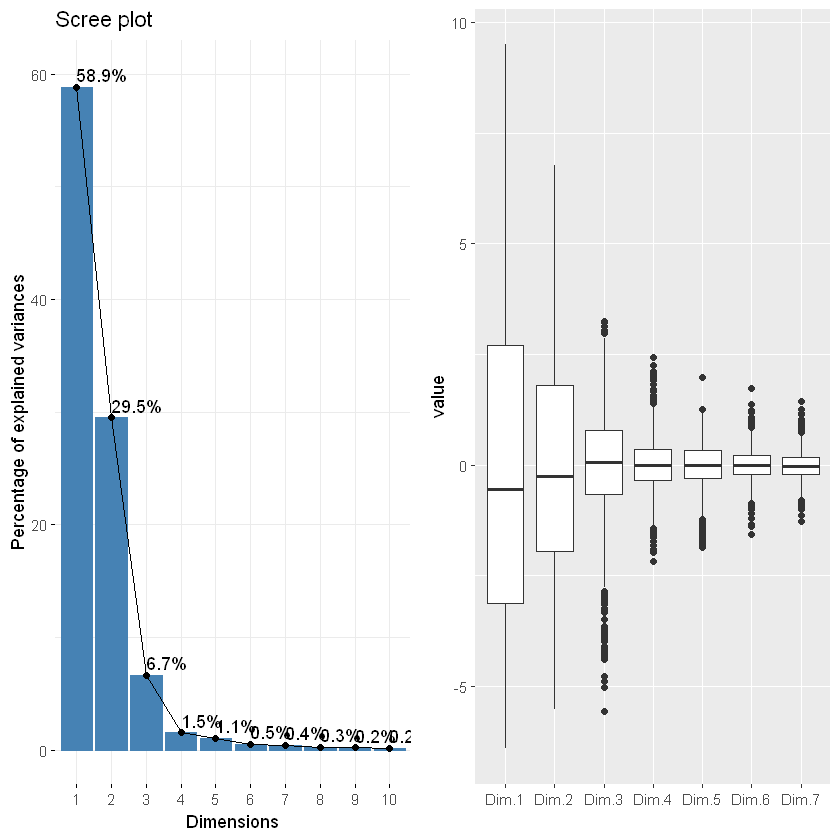

In [20]:
# ACP1
acp1 <- PCA(df1, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(25,26), ncp = 7)
g1<-fviz_eig(acp1, addlabels = TRUE, ylim = c(0, 60))
g2<-ggplot(melt(acp1$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

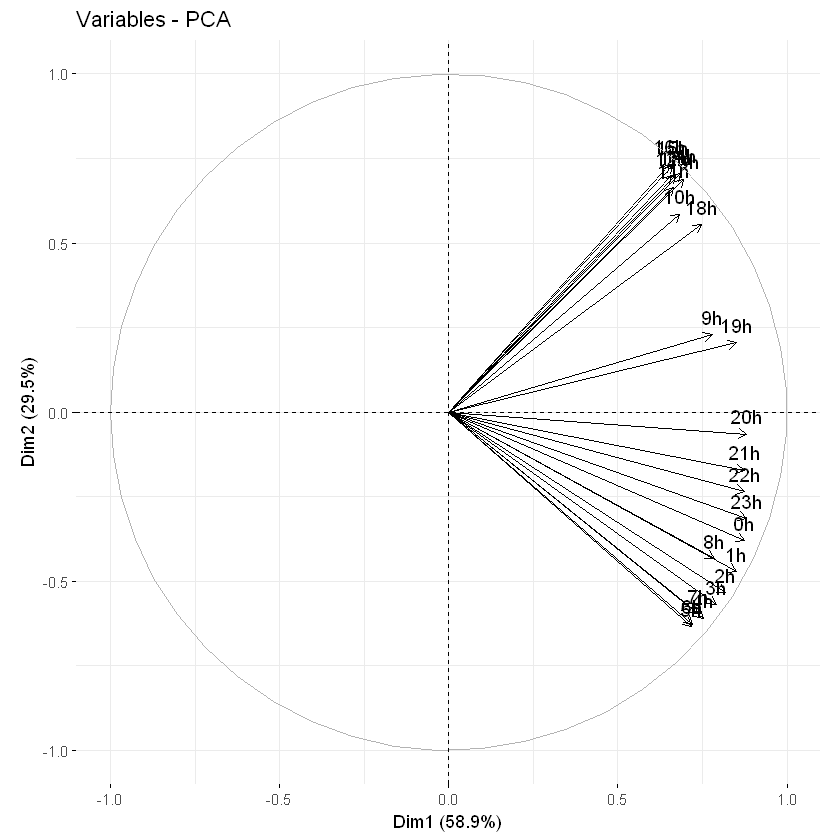

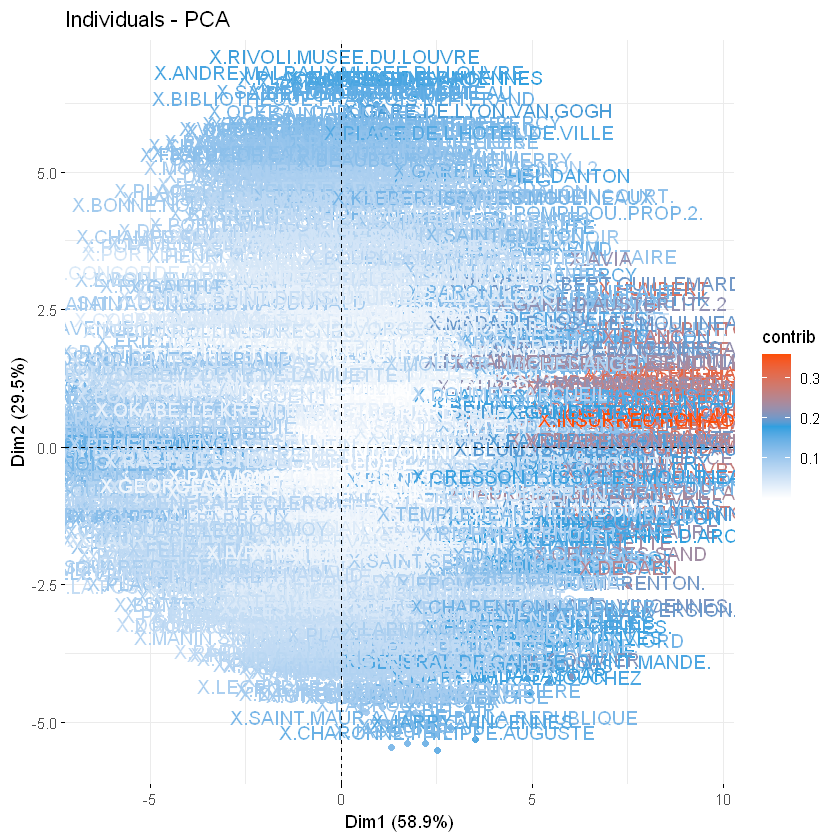

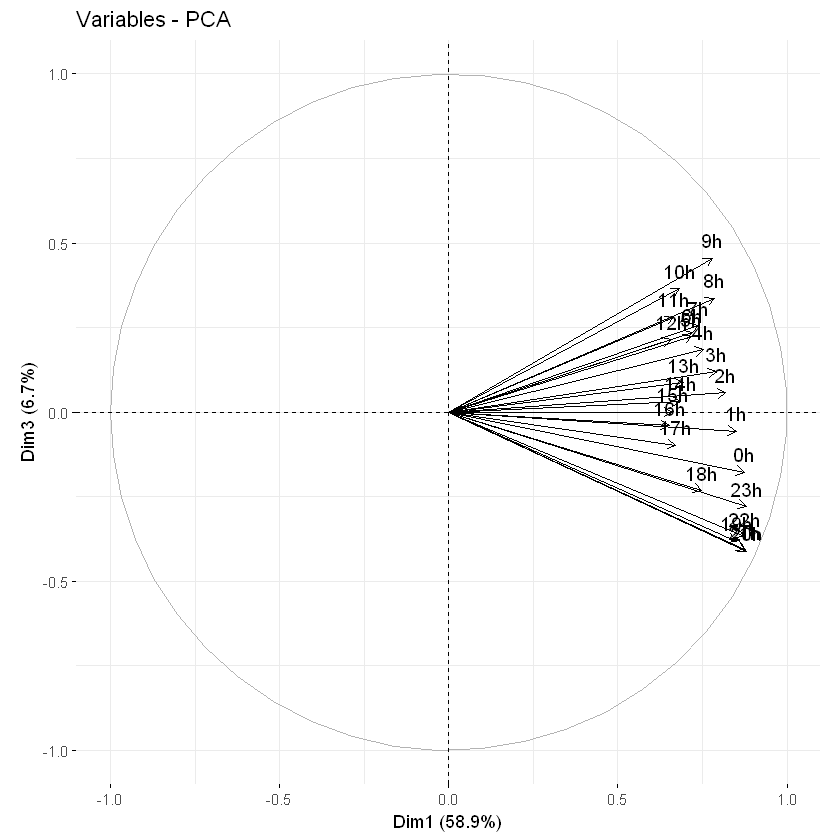

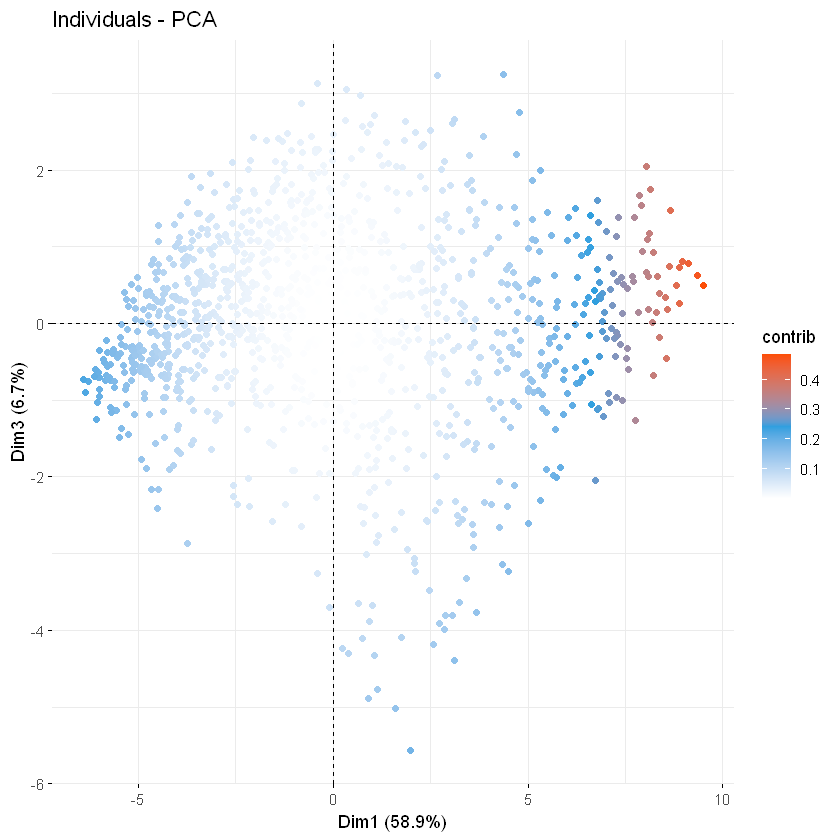

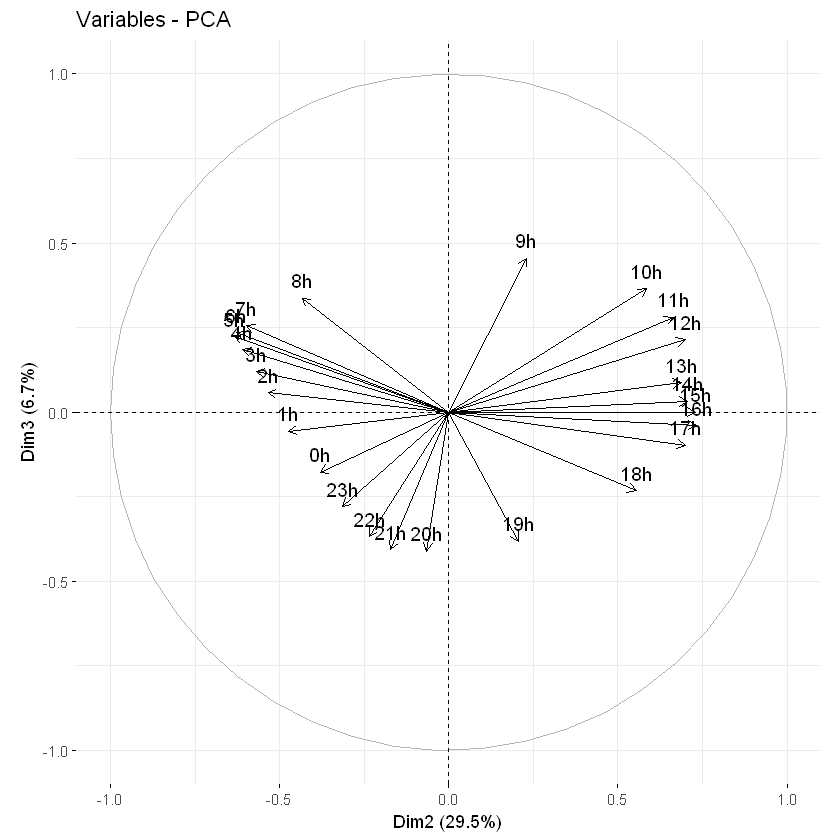

In [22]:
fviz_pca_var(acp1)
fviz_pca_ind(acp1,col.ind="contrib",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp1,axes=c(1,3))
fviz_pca_ind(acp1,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
fviz_pca_var(acp1,axes=c(2,3))

In [23]:
lundi <- rowMeans(loading[,c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)])
mardi <- rowMeans(loading[,c(25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48)])
mercredi <- rowMeans(loading[,c(49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72)])
jeudi <- rowMeans(loading[,c(73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96)])
vendredi <- rowMeans(loading[,c(97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120)])
samedi <- rowMeans(loading[,c(121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144)])
dimanche <- rowMeans(loading[,c(145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168)])

df2 <- data.frame(lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche)

colnames(df2) <- list("Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche")
df2$Station <- velib$names
df2$Station <- as.factor(df2$Station)
df2$Hill <- as.factor(coord$bonus)
head(df2)

Lundi     Mardi     Mercredi  Jeudi     Vendredi 
X.EURYALE.DEHAYNIN    0.1111493 0.2964616 0.3785273 0.3613867 0.4185957
X.LEMERCIER           0.3423913 0.5797101 0.5108696 0.5724638 0.5289855
X.MEZIERES.RENNES     0.2738741 0.6266798 0.3893939 0.4568182 0.5717312
X.FARMAN              0.7599206 0.3670635 0.3091931 0.3302599 0.3115079
X.QUAI.DE.LA.RAPEE    0.7366092 0.6083758 0.5507157 0.4502161 0.5980819
X.CHOISY.POINT.D.IVRY 0.2031250 0.4548611 0.3645833 0.3489583 0.2588315
                      Samedi    Dimanche  Station              Hill
X.EURYALE.DEHAYNIN    0.2448192 0.1340812  EURYALE DEHAYNIN    0   
X.LEMERCIER           0.6050725 0.4040679  LEMERCIER           0   
X.MEZIERES.RENNES     0.5321409 0.4166667  MEZIERES RENNES     0   
X.FARMAN              0.3115079 0.6527778  FARMAN              0   
X.QUAI.DE.LA.RAPEE    0.3568320 0.4084596  QUAI DE LA RAPEE    0   
X.CHOISY.POINT.D.IVRY 0.6255284 0.1678512  CHOISY POINT D'IVRY 0

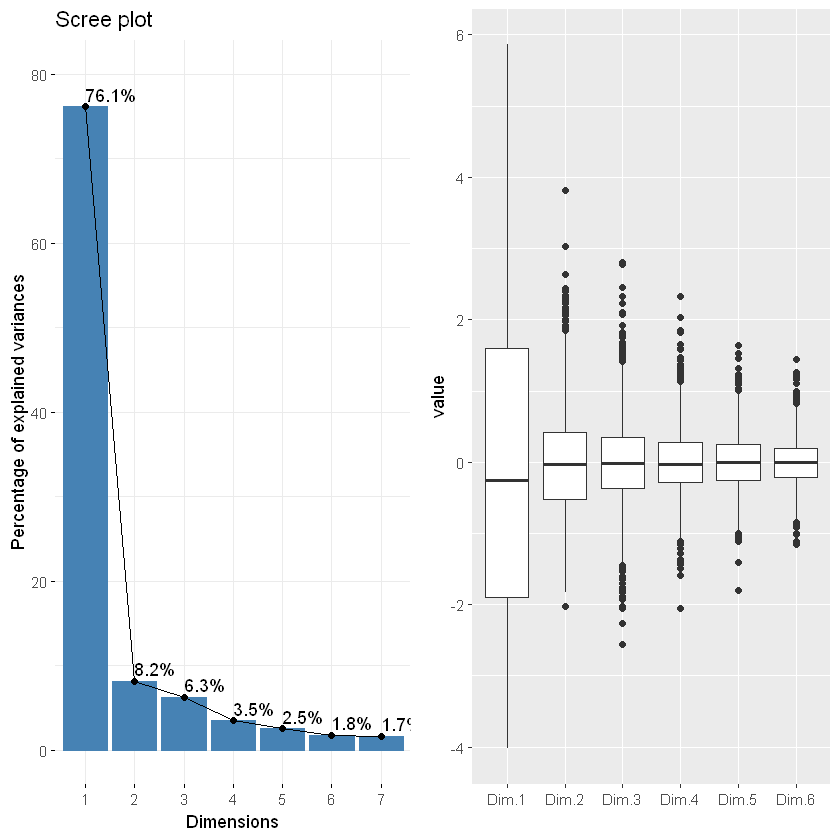

In [24]:
# ACP réduite
acp2 <- PCA(df2, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(8,9), ncp = 6)
g1<-fviz_eig(acp2, addlabels = TRUE, ylim = c(0, 80))
g2<-ggplot(melt(acp2$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

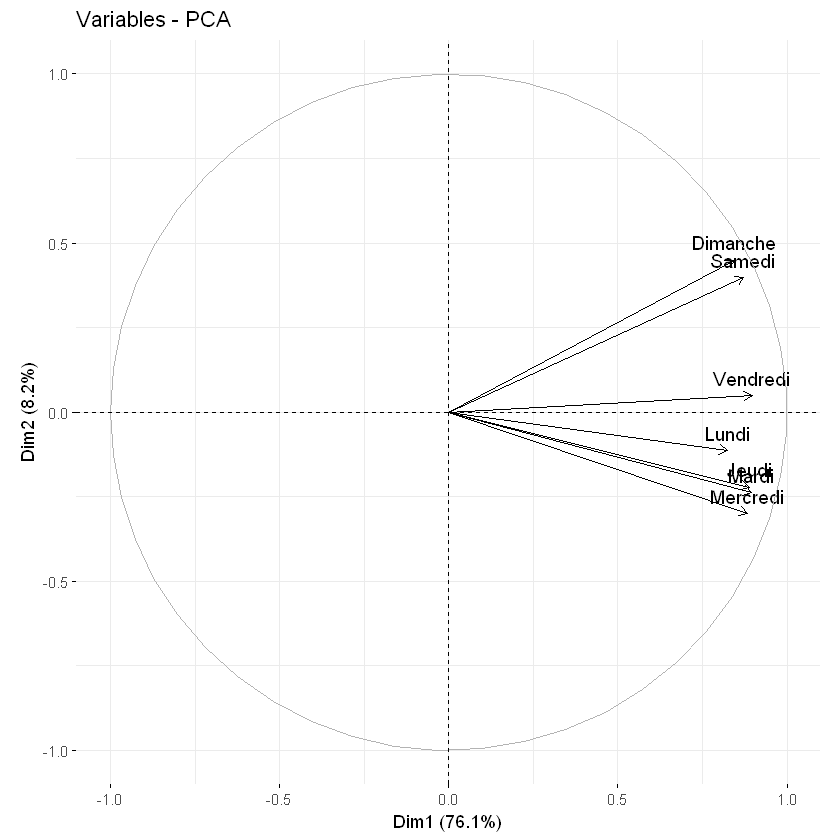

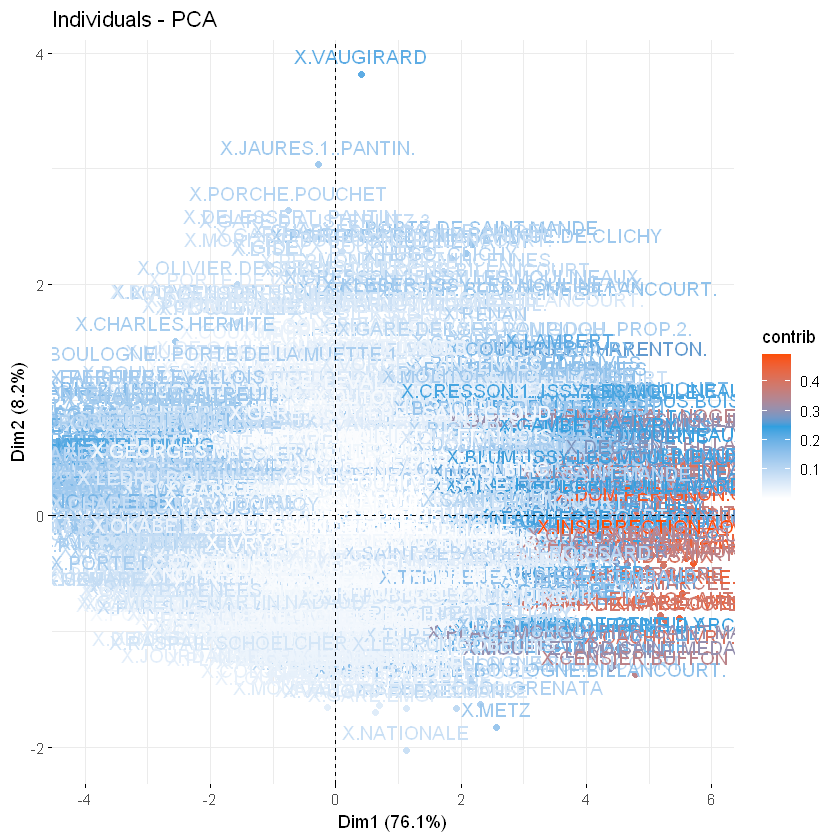

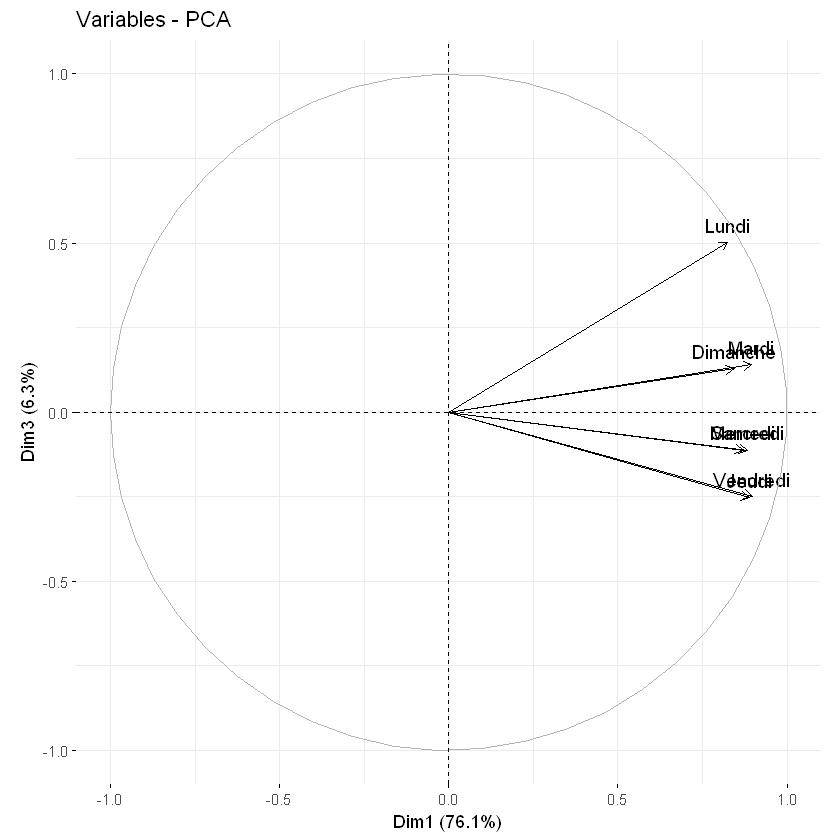

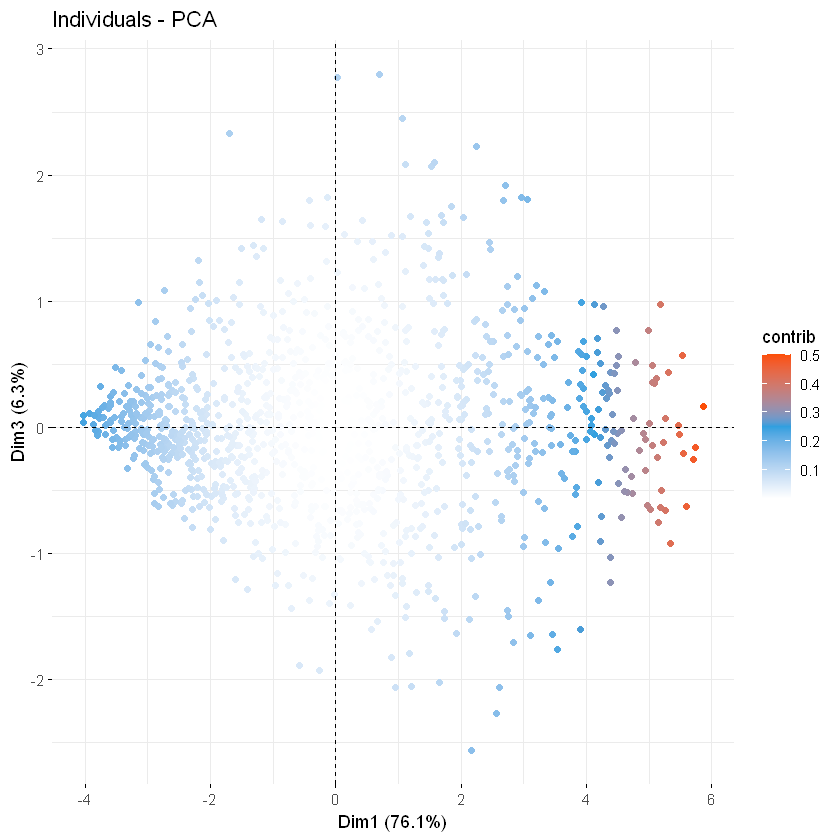

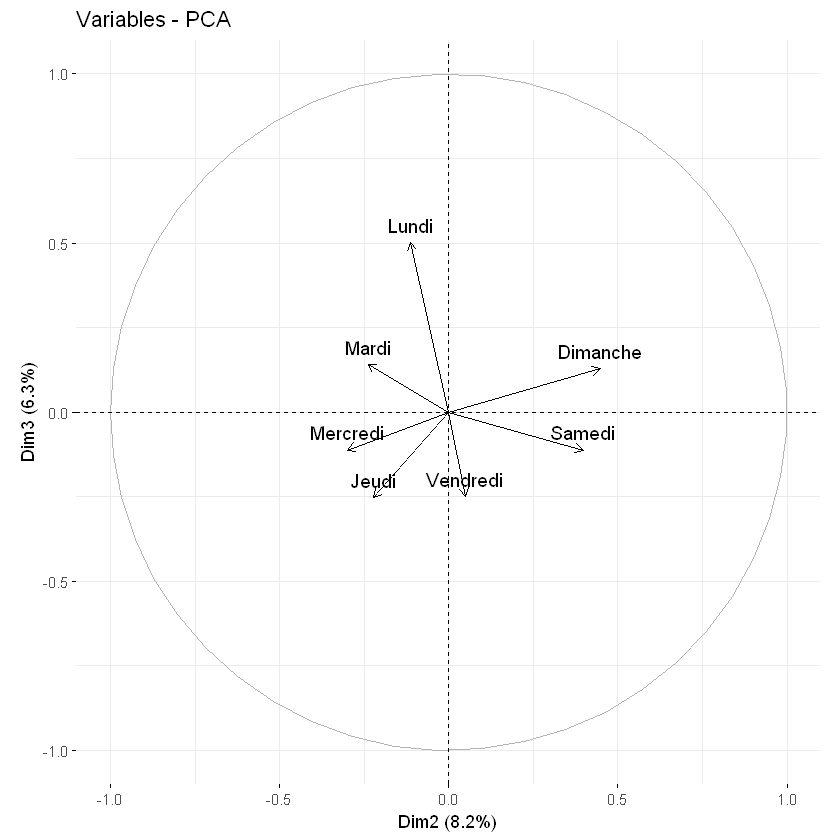

In [25]:
fviz_pca_var(acp2)
fviz_pca_ind(acp2,col.ind="contrib",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp2,axes=c(1,3))
fviz_pca_ind(acp2,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
fviz_pca_var(acp2,axes=c(2,3))